<a href="https://colab.research.google.com/github/MarcoBarrionuevo/MarcoBarrionuevo/blob/main/Con_APC_Proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISIS POR COMPONENTES - PCA


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
# Divide los datos en train y  test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from keras.optimizers import SGD
## Para el Análisis de APC
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
data_frame = pd.read_csv('laptop_price.csv',encoding='ISO-8859-1')
data_frame.info()
num_componentes_PCA=4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
data_frame['Ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: Ram, Length: 1303, dtype: object

In [3]:
data_frame['Ram'] = data_frame['Ram'].apply(lambda x: int(x.replace('GB','')))
#df['age']=df.apply(lambda x: x['age']+3,axis=1)
data_frame['Ram']


0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int64

In [ ]:
data_frame['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1298     1.8kg
1299     1.3kg
1300     1.5kg
1301    2.19kg
1302     2.2kg
Name: Weight, Length: 1303, dtype: object

In [4]:
data_frame['Weight'] = data_frame['Weight'].apply(lambda x: float(x.replace('kg','')))

In [ ]:
data_frame['Ram']
data_frame['Weight']


0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [5]:
data_aux = data_frame.drop(['laptop_ID','Product','Company','TypeName','ScreenResolution'],axis=1)
data_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inches       1303 non-null   float64
 1   Cpu          1303 non-null   object 
 2   Ram          1303 non-null   int64  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float64
 7   Price_euros  1303 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 81.6+ KB


In [6]:
data_final = pd.get_dummies(data_aux)

In [7]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 280 entries, Inches to OpSys_macOS
dtypes: float64(3), int64(1), uint8(276)
memory usage: 392.0 KB


In [8]:
data_final.shape
data_final.describe()

,Inches,Ram,Weight,Price_euros,Cpu_AMD A10-Series 9600P 2.4GHz,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,...,Gpu_Nvidia GeForce GTX 1060,Gpu_Nvidia GeForce GTX 1070,Gpu_Nvidia GeForce GTX 1070M,Gpu_Nvidia GeForce GTX 1080,Gpu_Nvidia GeForce GTX 930MX,Gpu_Nvidia GeForce GTX 940M,Gpu_Nvidia GeForce GTX 940MX,Gpu_Nvidia GeForce GTX 950M,Gpu_Nvidia GeForce GTX 960,Gpu_Nvidia GeForce GTX 960<U+039C>,Gpu_Nvidia GeForce GTX 960M,Gpu_Nvidia GeForce GTX 965M,Gpu_Nvidia GeForce GTX 970M,Gpu_Nvidia GeForce GTX 980,Gpu_Nvidia GeForce GTX 980M,Gpu_Nvidia GeForce GTX1050 Ti,Gpu_Nvidia GeForce GTX1060,Gpu_Nvidia GeForce GTX1080,Gpu_Nvidia GeForce MX130,Gpu_Nvidia GeForce MX150,Gpu_Nvidia Quadro 3000M,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,...,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992,0.001535,0.001535,0.001535,0.000767,0.001535,0.003837,0.000767,0.000767,0.005372,0.000767,0.001535,0.003070,0.002302,0.000767,0.008442,0.001535,0.000767,0.001535,0.000767,0.000767,0.000767,0.000767,0.001535,0.000767,0.000767,0.000767,0.002302,0.001535,0.000767,0.000767,0.003837,0.003070,0.003070,0.002302,0.008442,0.000767,...,0.036838,0.023024,0.000767,0.004605,0.000767,0.000767,0.003070,0.005372,0.001535,0.001535,0.010744,0.003070,0.003837,0.000767,0.007675,0.000767,0.000767,0.000767,0.004605,0.011512,0.000767,0.003070,0.006907,0.001535,0.001535,0.002302,0.000767,0.000767,0.001535,0.003837,0.000767,0.001535,0.020721,0.047583,0.006140,0.050652,0.822717,0.006140,0.034536,0.009977
std,1.426304,5.084665,0.665475,699.009043,0.039163,0.039163,0.039163,0.027703,0.039163,0.061851,0.027703,0.027703,0.073126,0.027703,0.039163,0.055342,0.047946,0.027703,0.09

In [9]:
data_final.isnull().sum()

Inches                             0
Ram                                0
Weight                             0
Price_euros                        0
Cpu_AMD A10-Series 9600P 2.4GHz    0
                                  ..
OpSys_No OS                        0
OpSys_Windows 10                   0
OpSys_Windows 10 S                 0
OpSys_Windows 7                    0
OpSys_macOS                        0
Length: 280, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3663810ad0>,
      dtype=object)

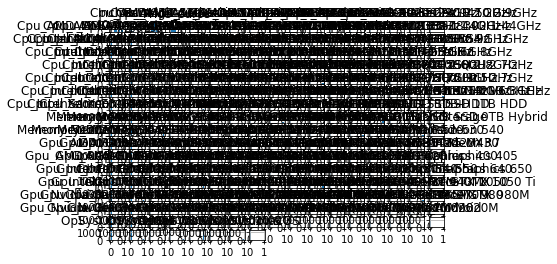

In [ ]:
data_final.hist()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


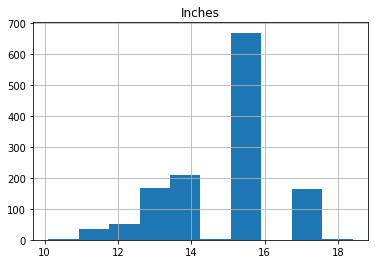

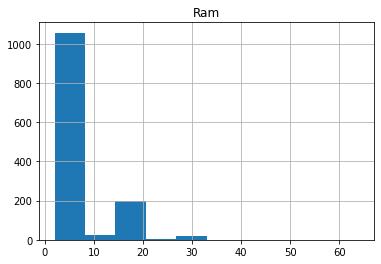

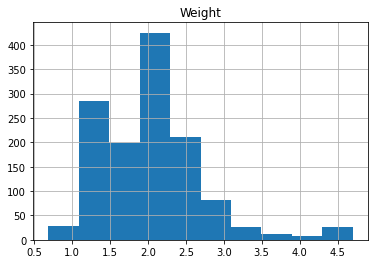

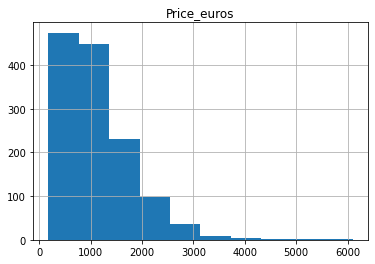

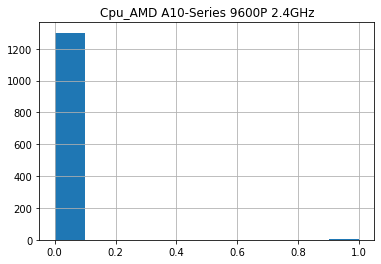

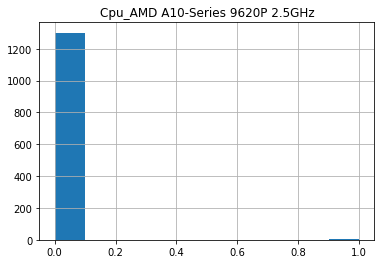

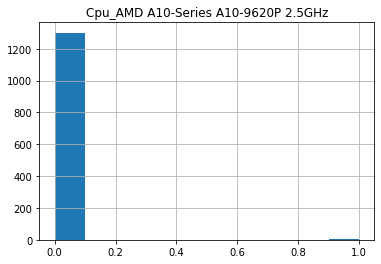

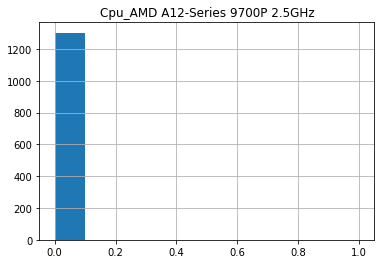

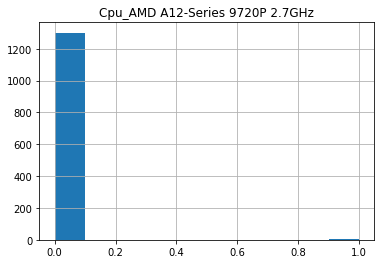

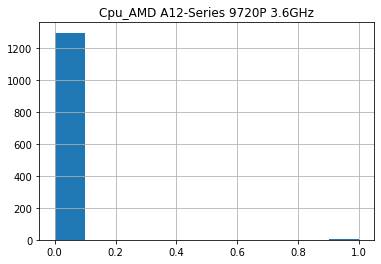

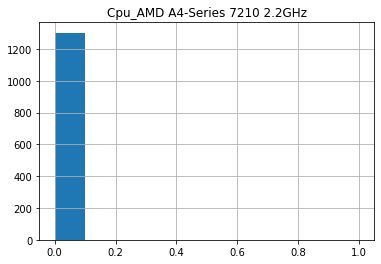

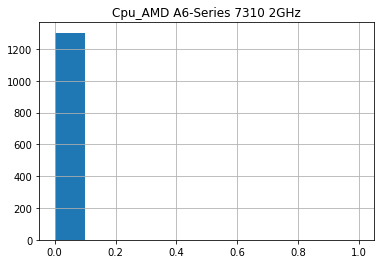

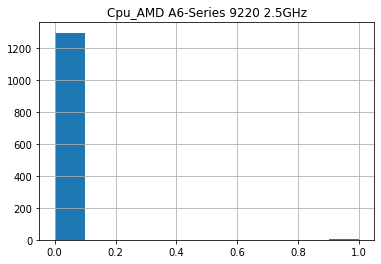

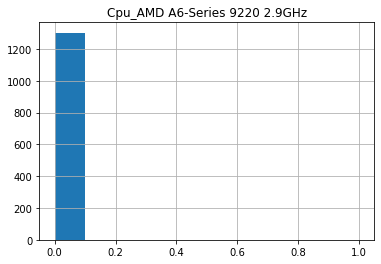

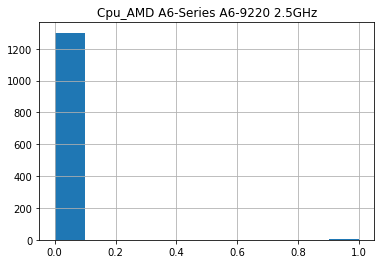

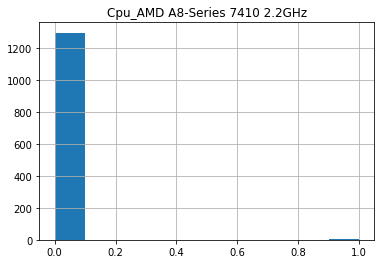

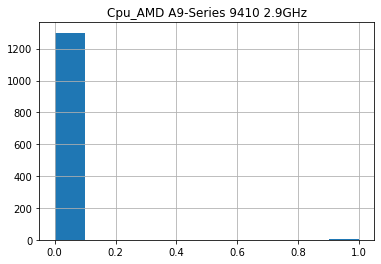

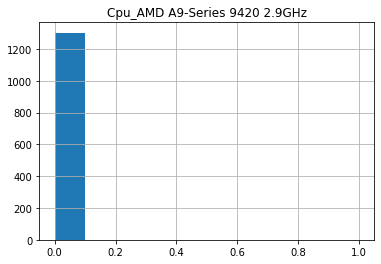

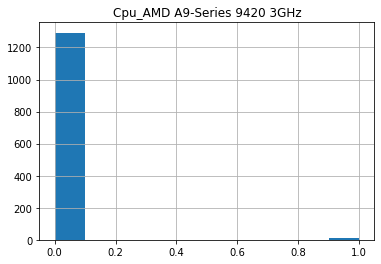

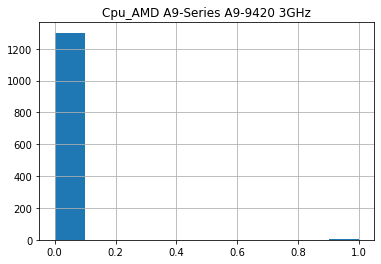

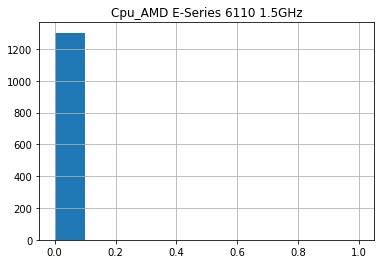

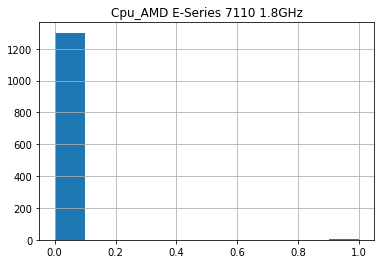

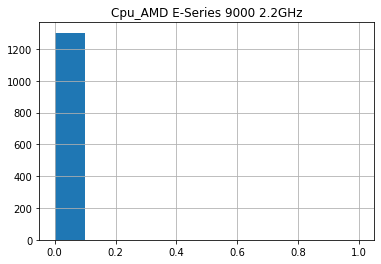

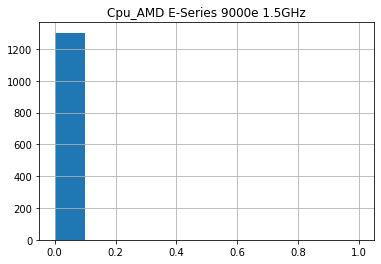

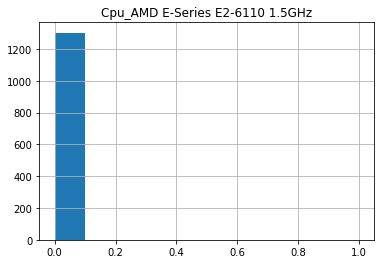

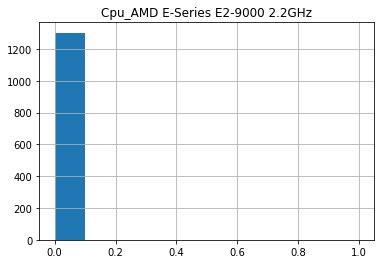

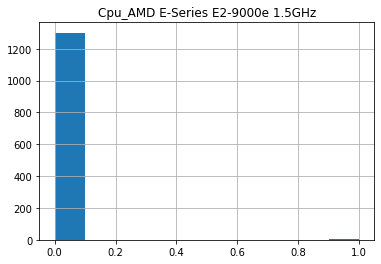

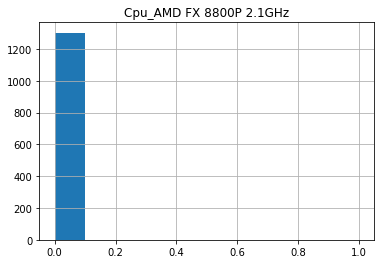

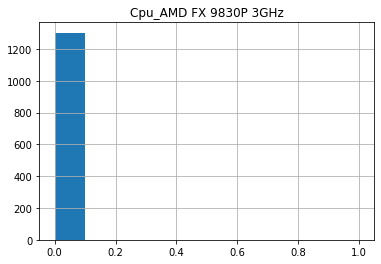

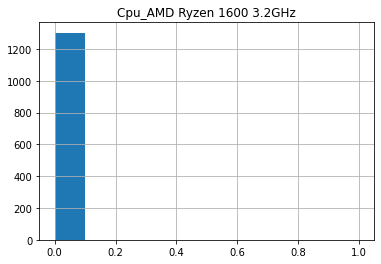

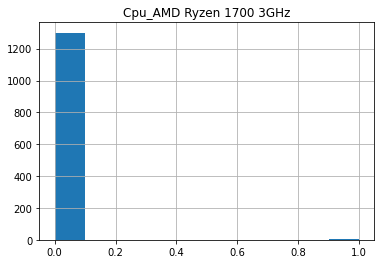

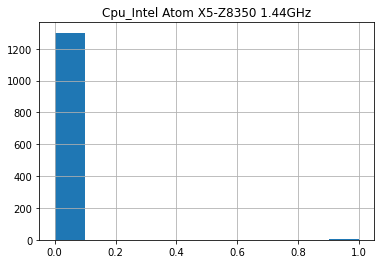

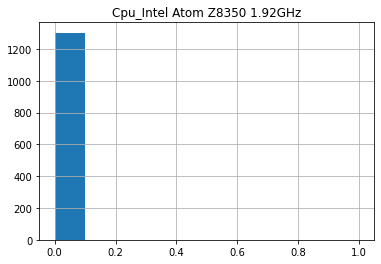

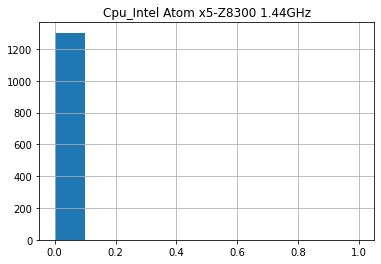

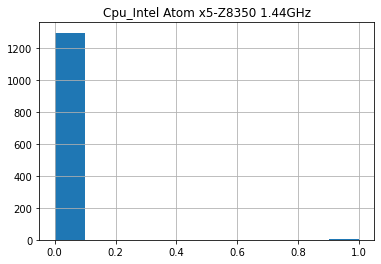

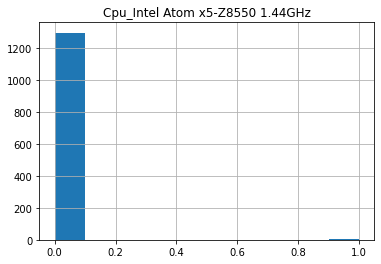

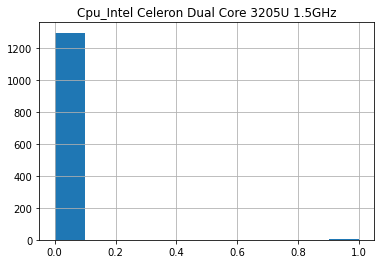

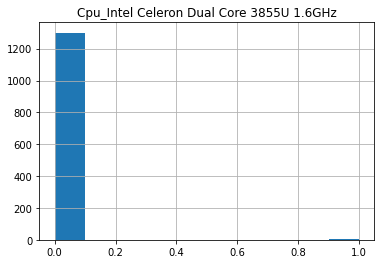

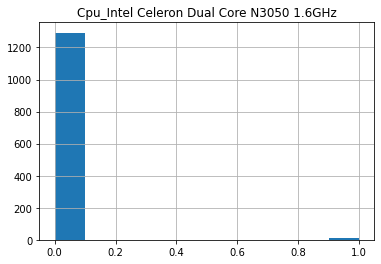

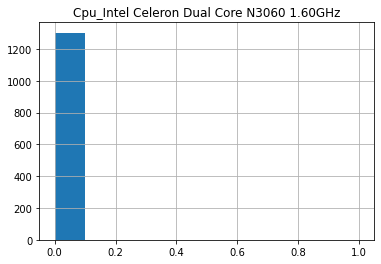

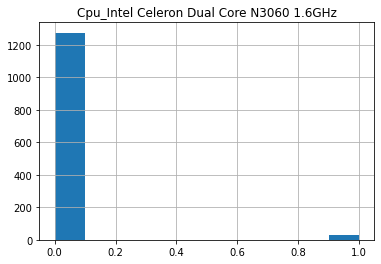

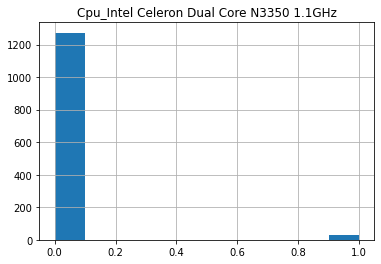

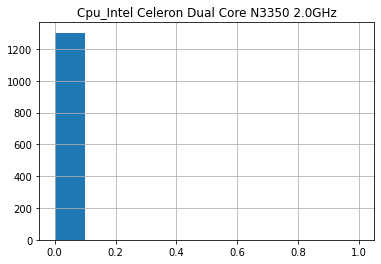

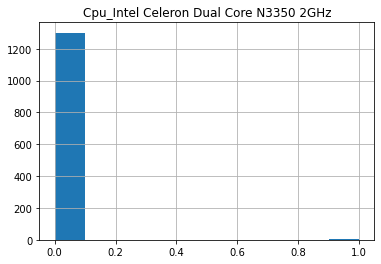

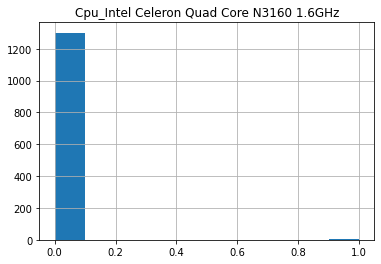

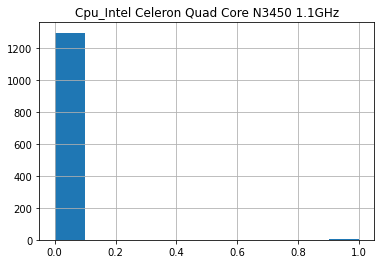

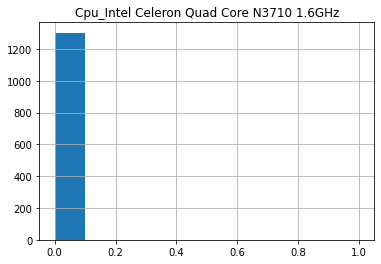

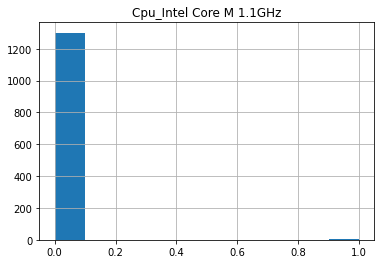

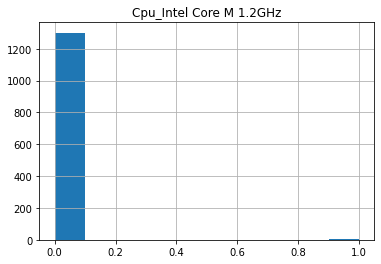

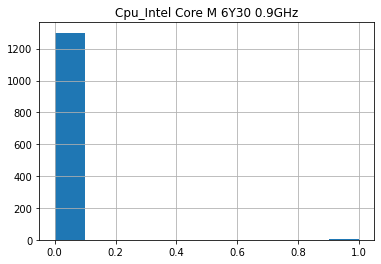

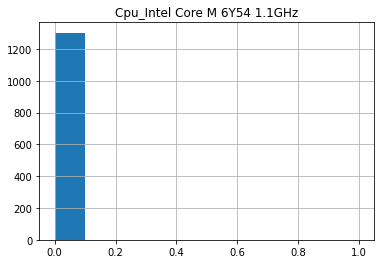

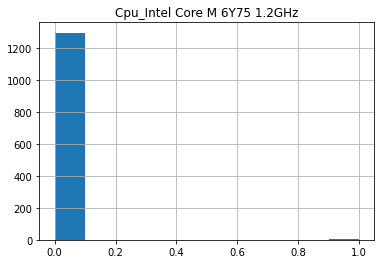

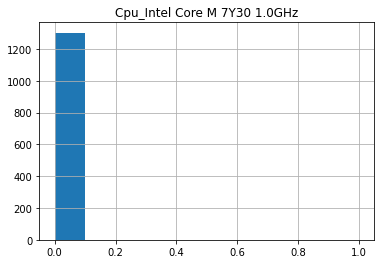

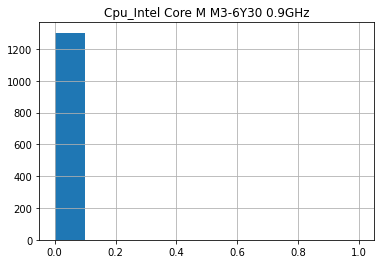

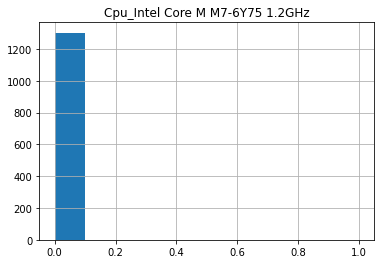

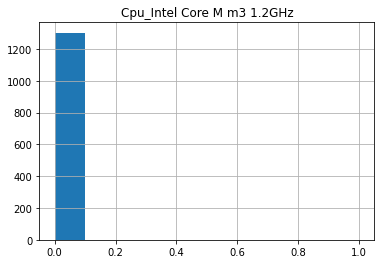

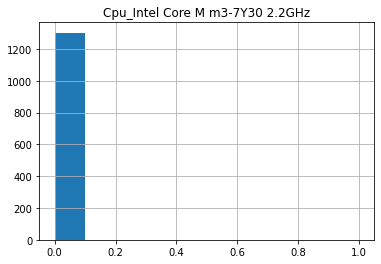

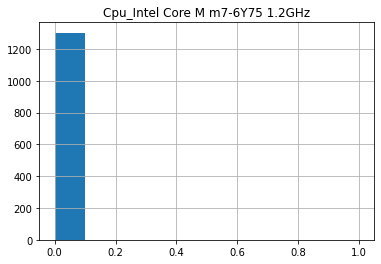

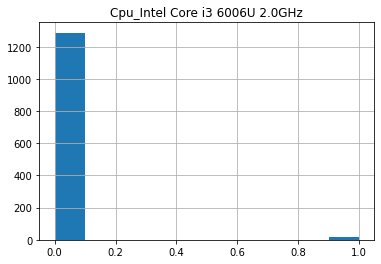

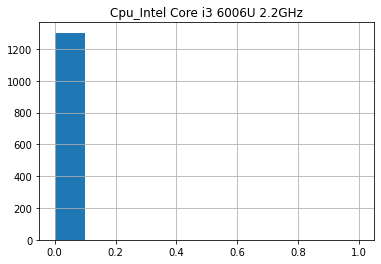

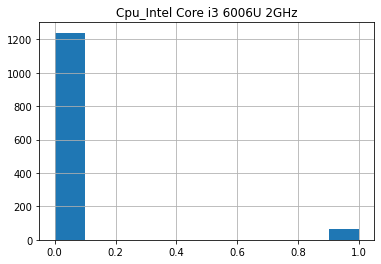

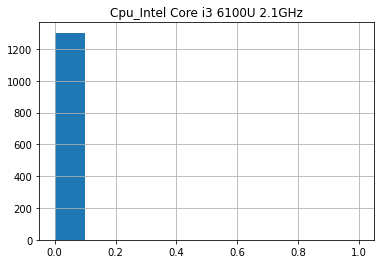

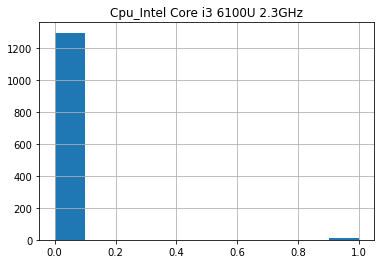

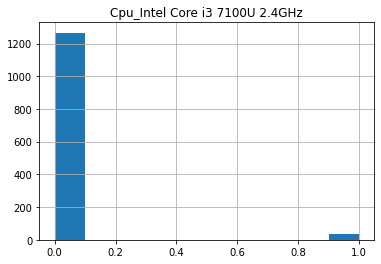

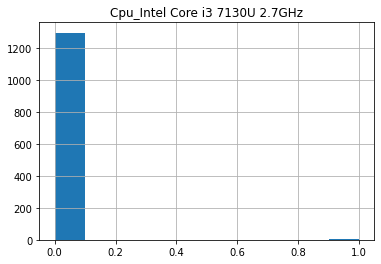

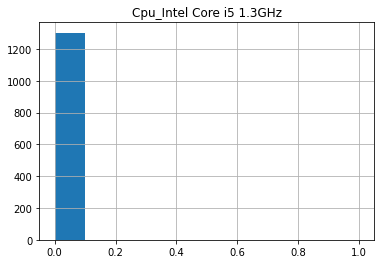

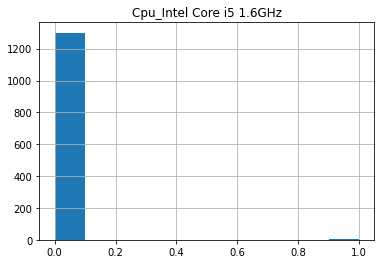

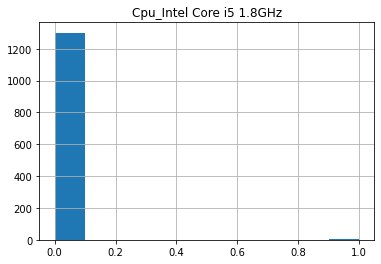

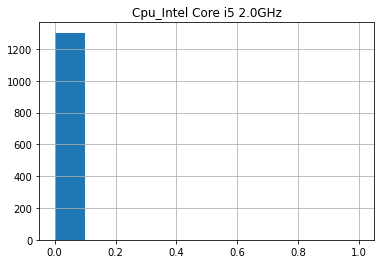

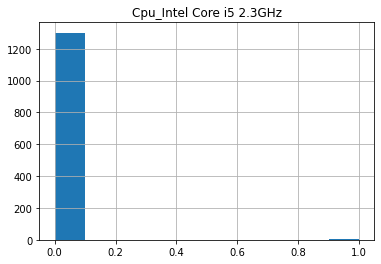

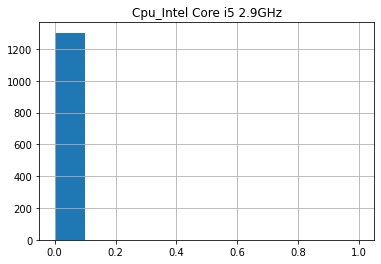

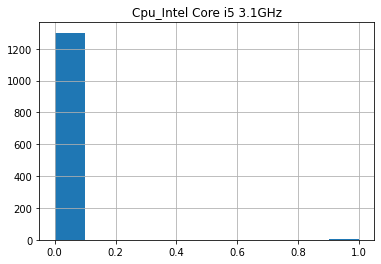

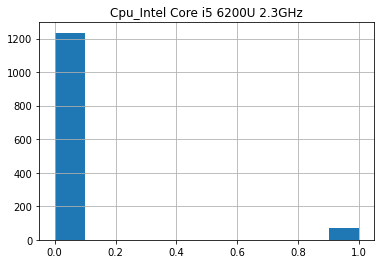

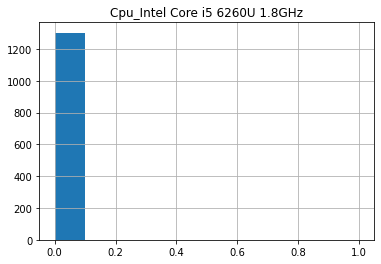

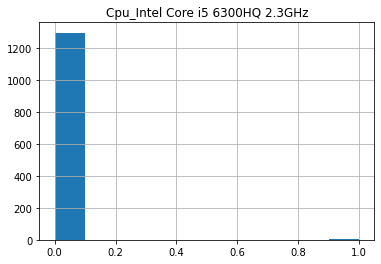

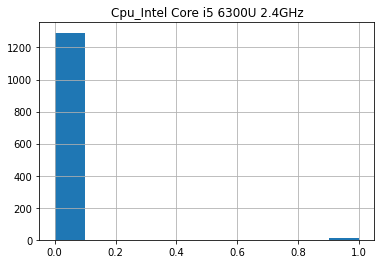

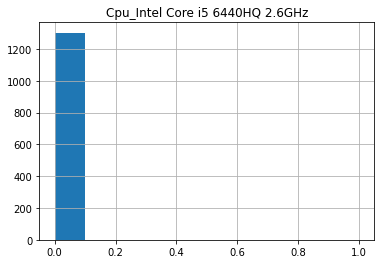

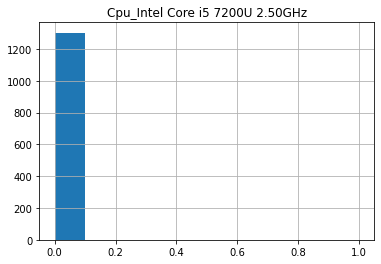

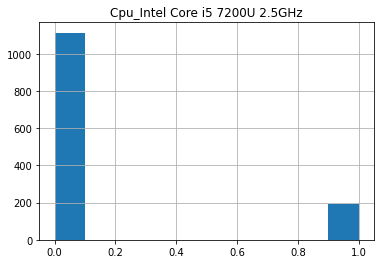

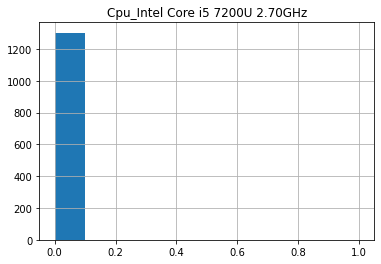

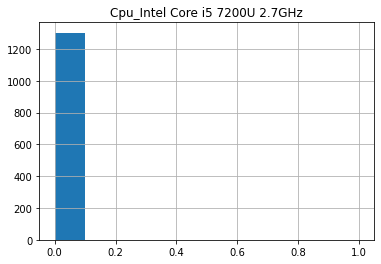

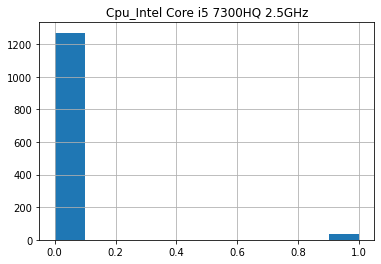

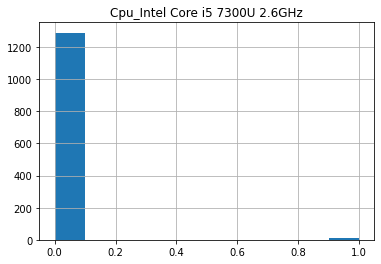

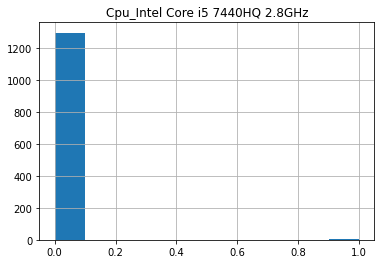

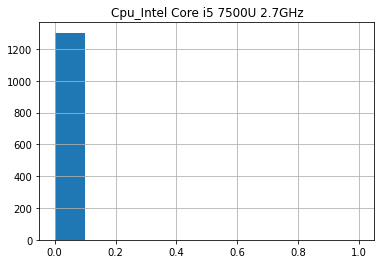

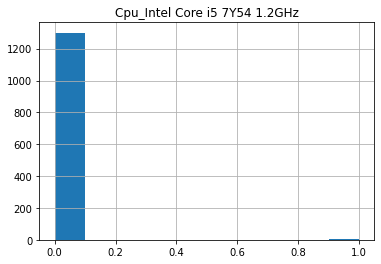

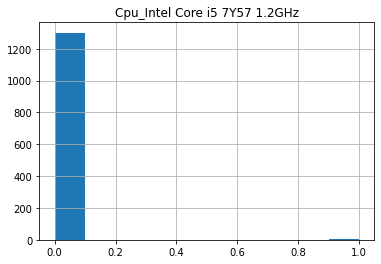

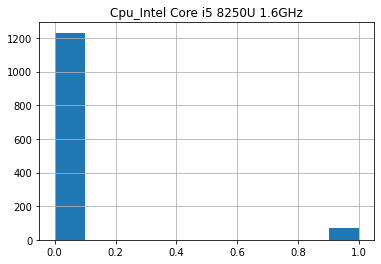

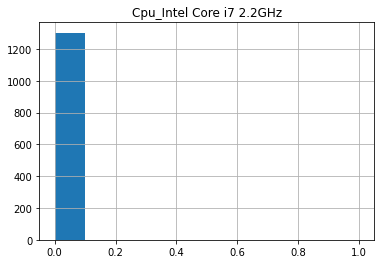

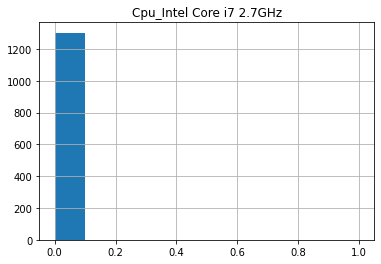

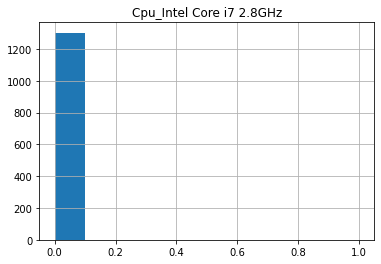

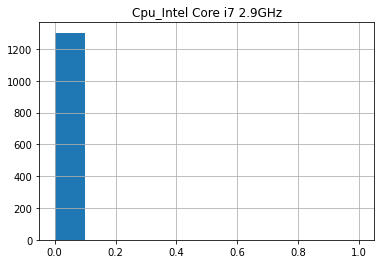

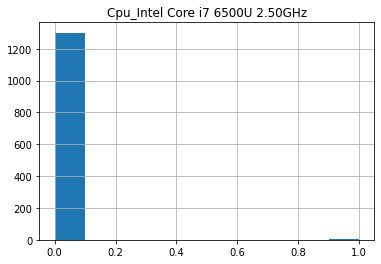

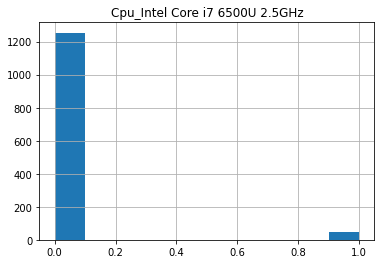

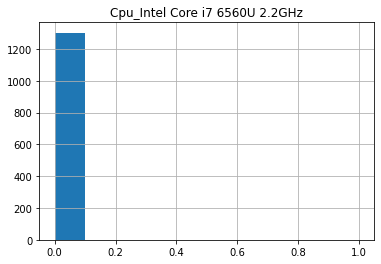

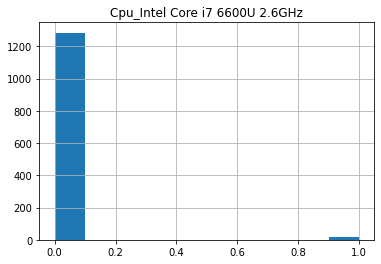

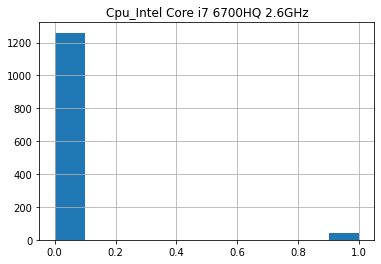

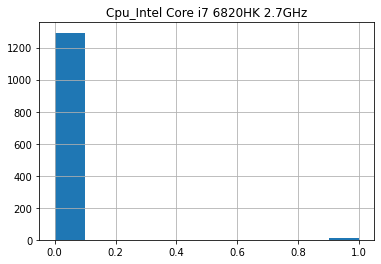

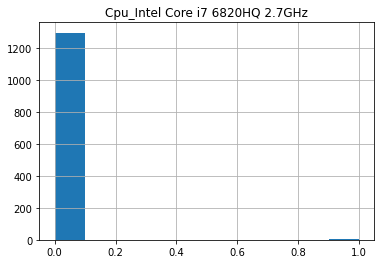

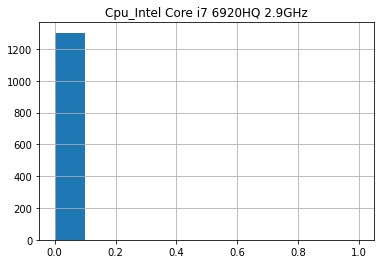

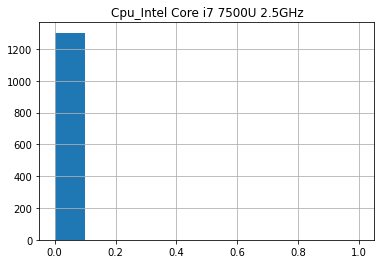

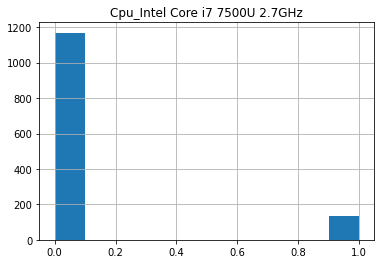

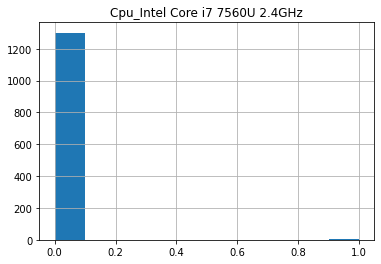

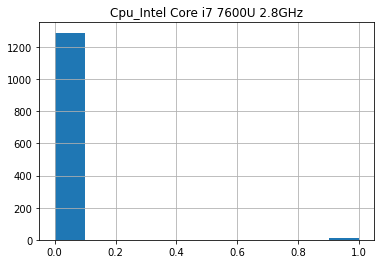

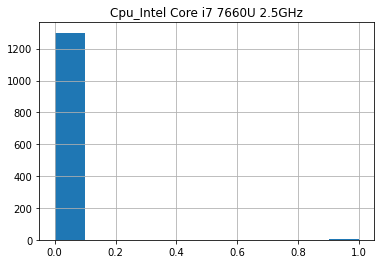

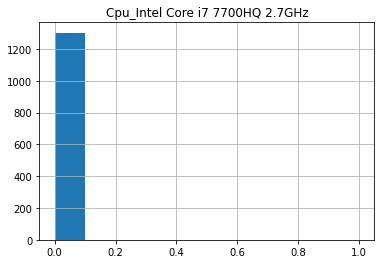

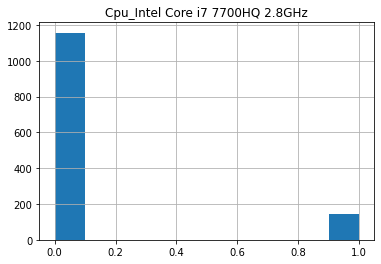

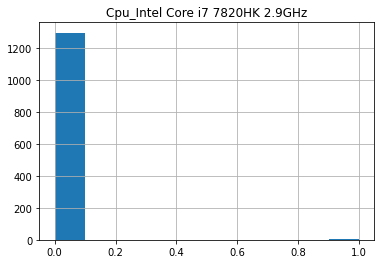

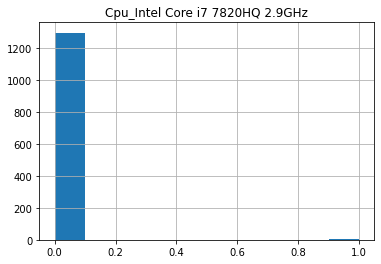

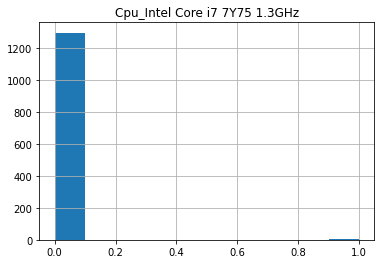

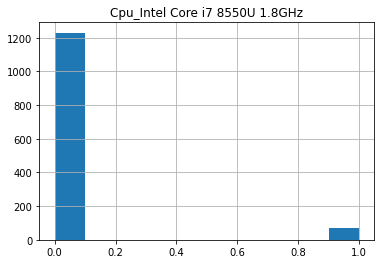

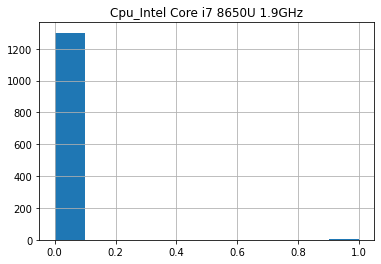

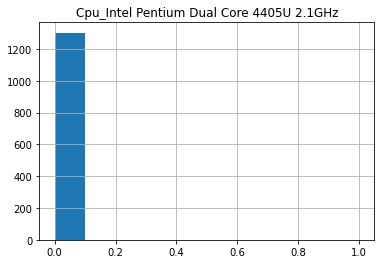

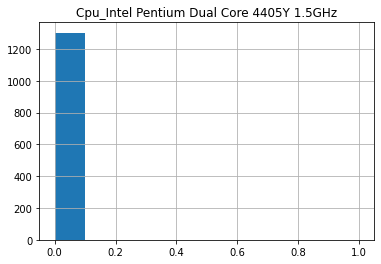

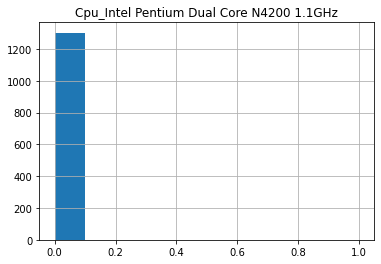

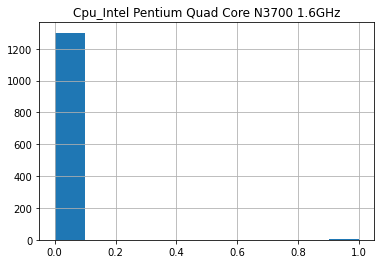

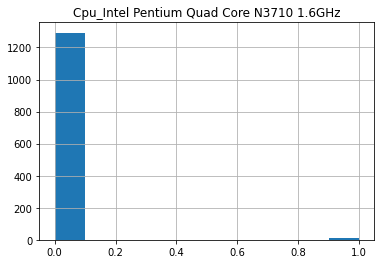

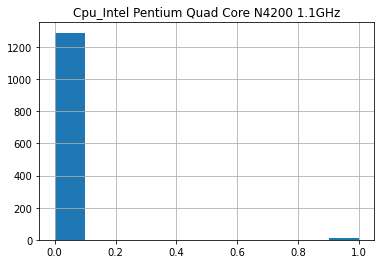

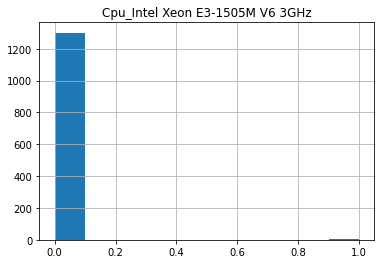

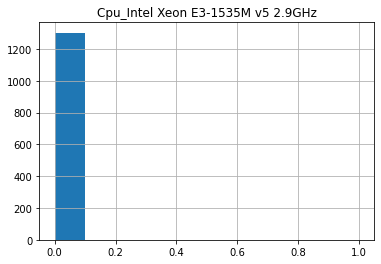

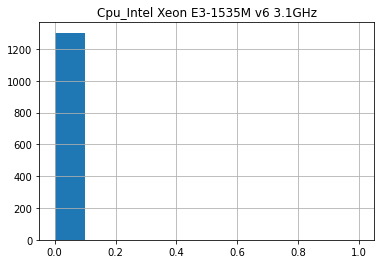

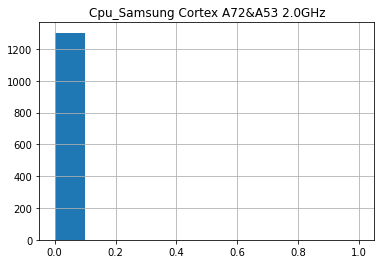

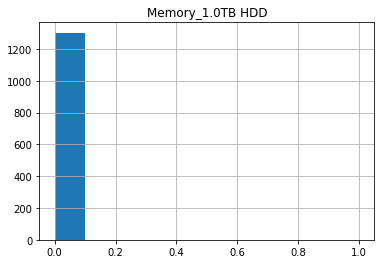

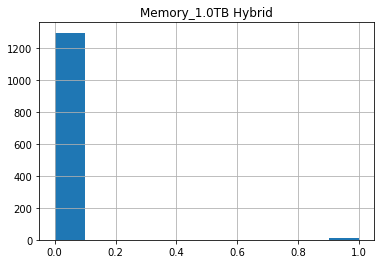

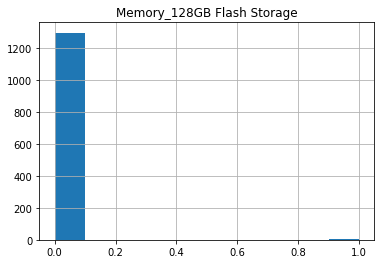

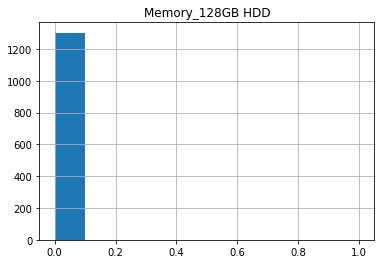

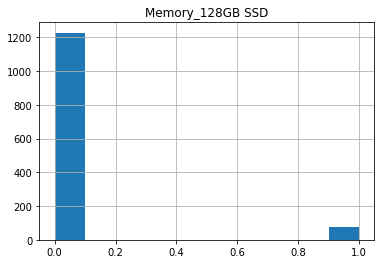

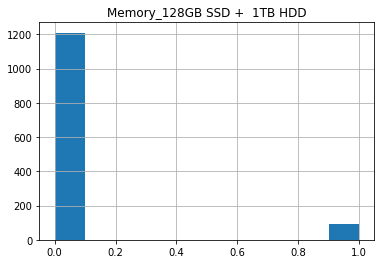

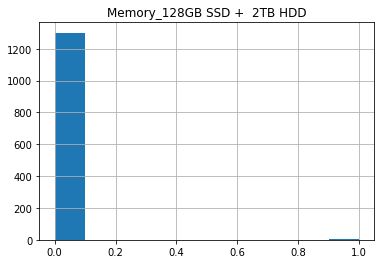

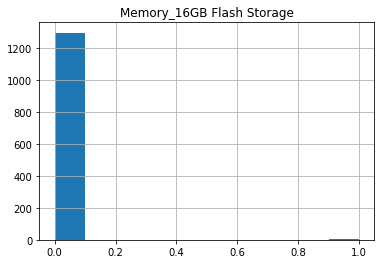

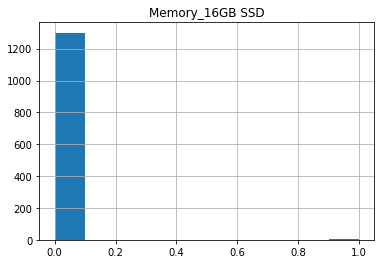

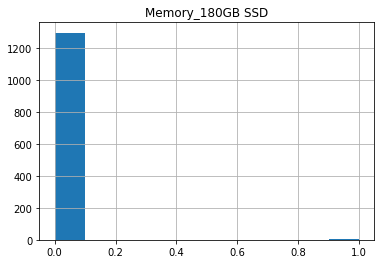

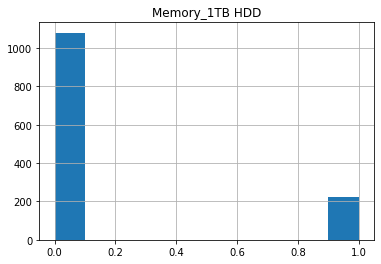

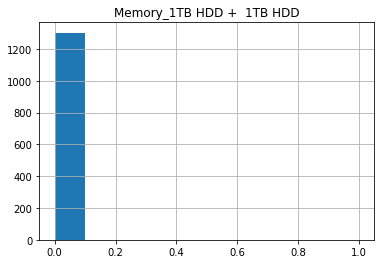

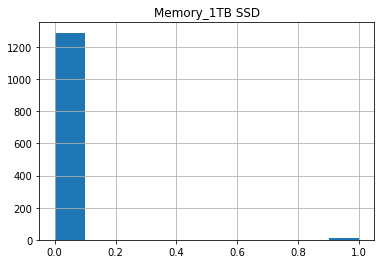

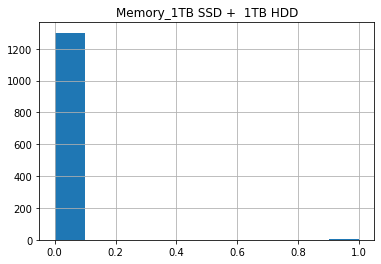

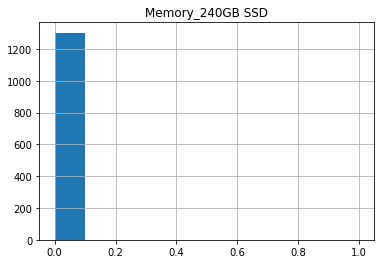

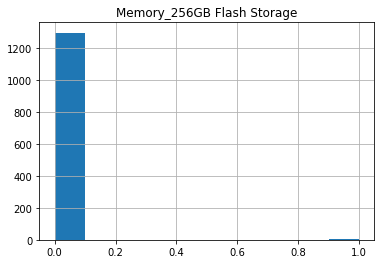

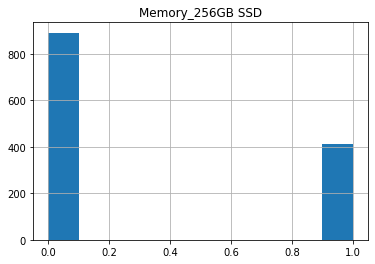

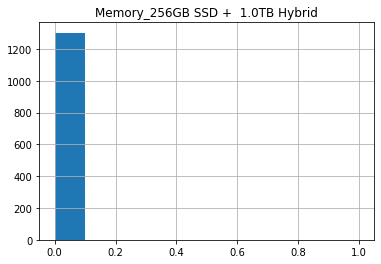

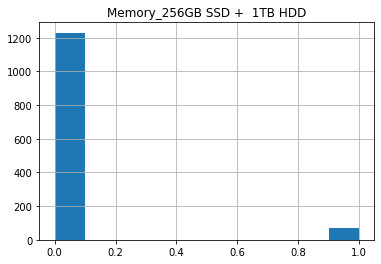

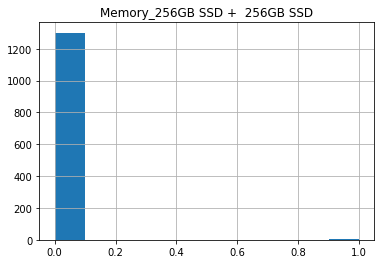

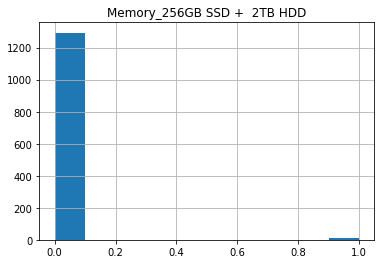

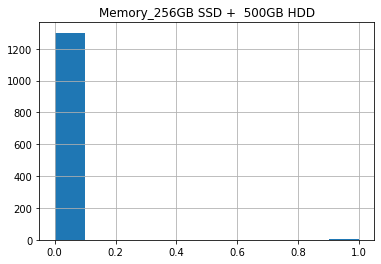

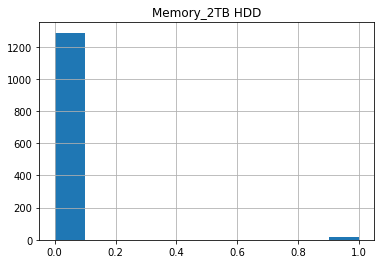

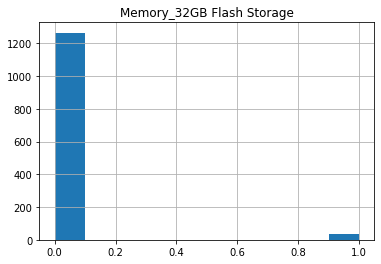

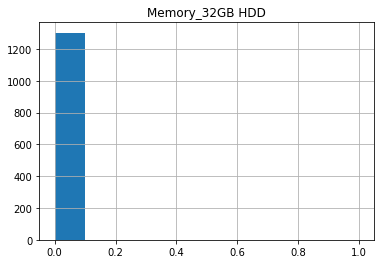

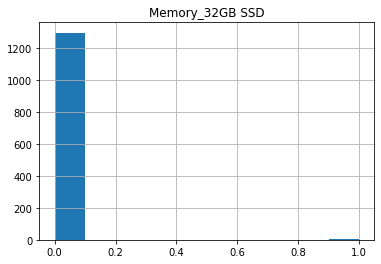

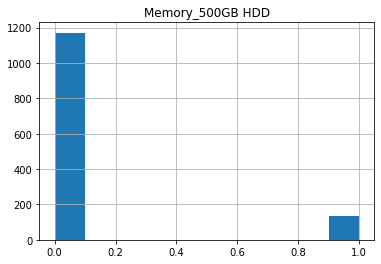

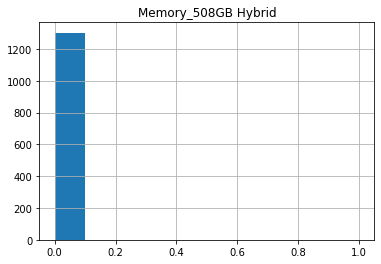

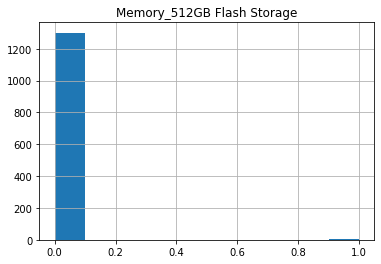

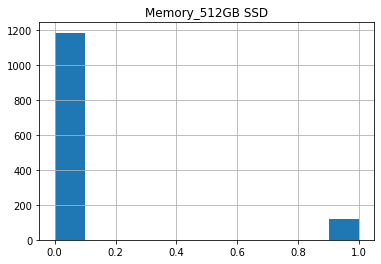

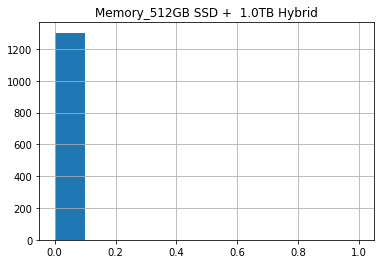

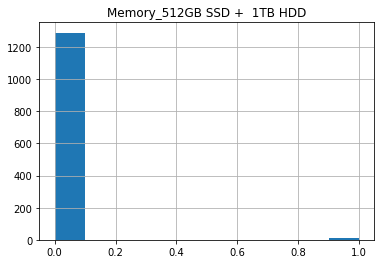

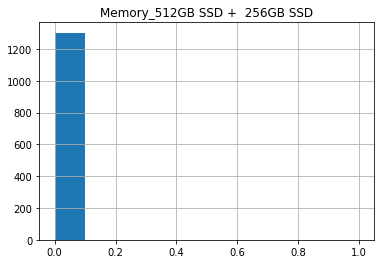

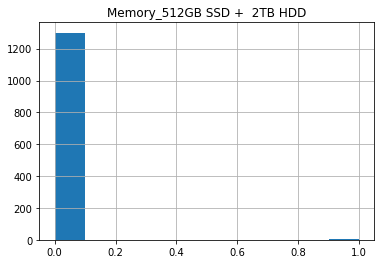

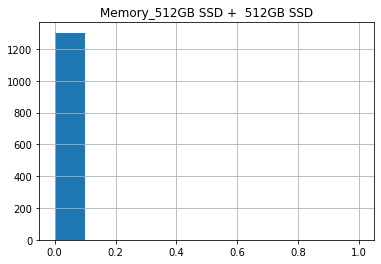

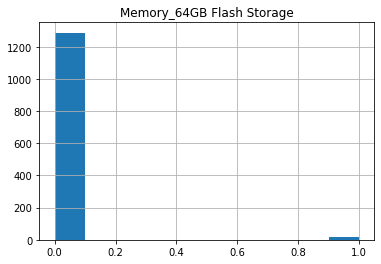

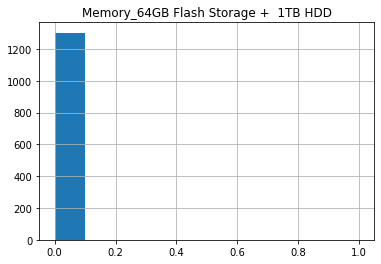

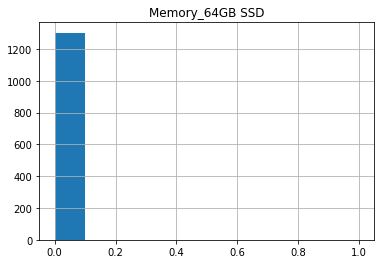

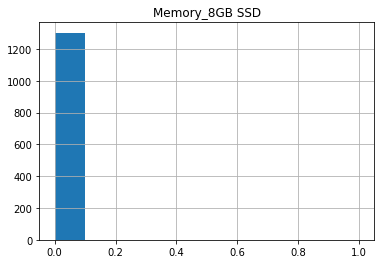

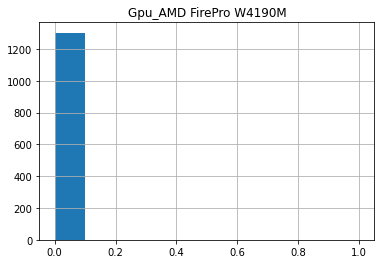

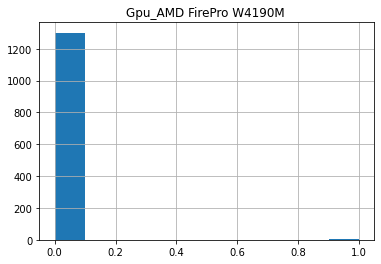

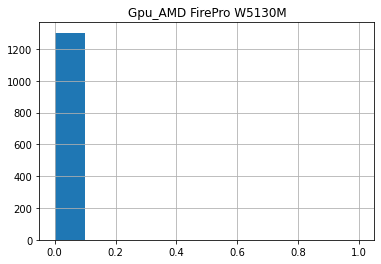

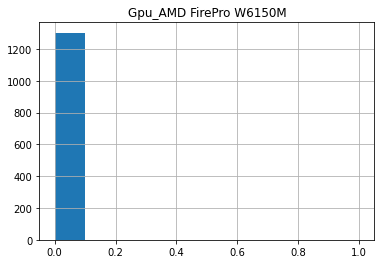

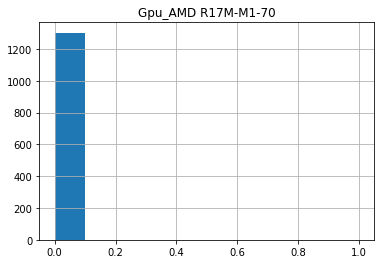

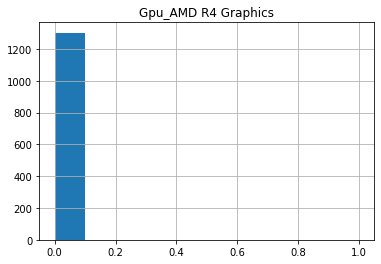

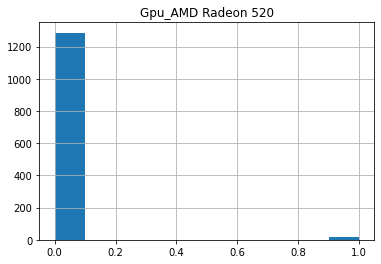

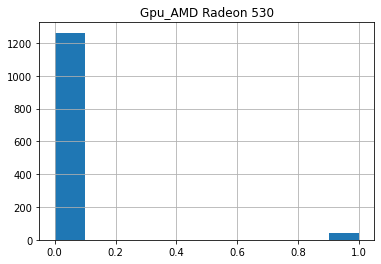

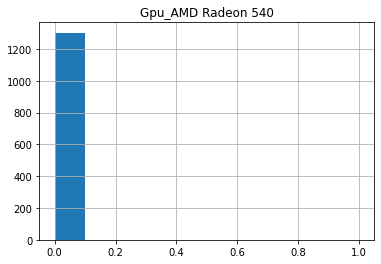

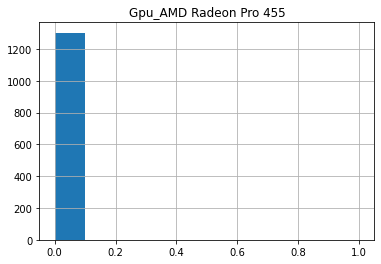

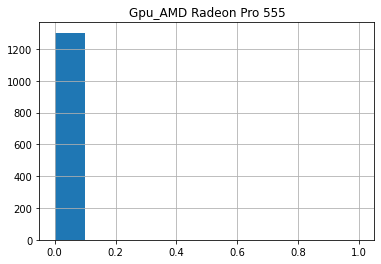

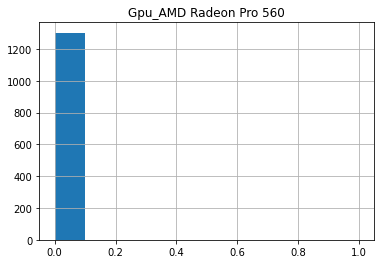

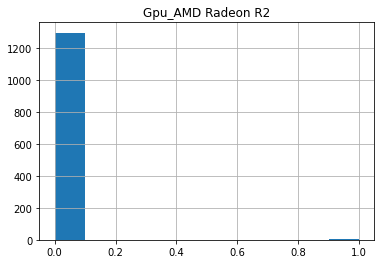

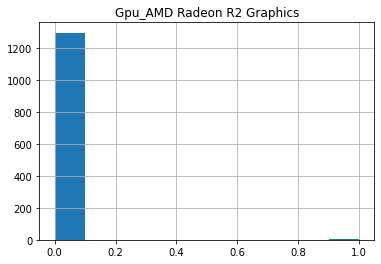

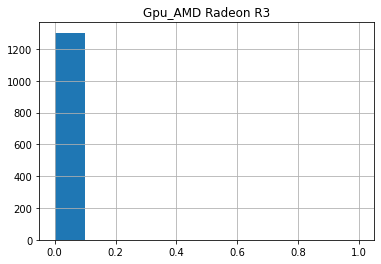

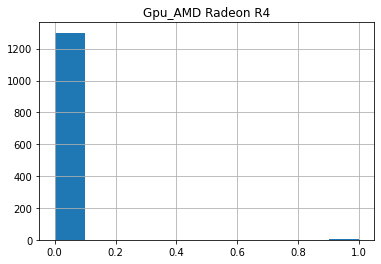

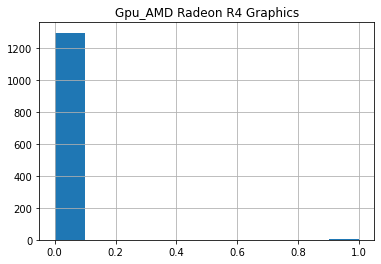

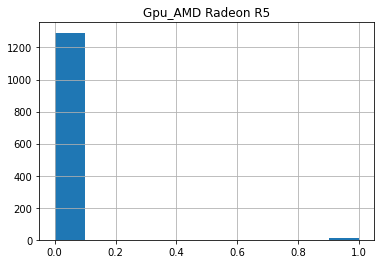

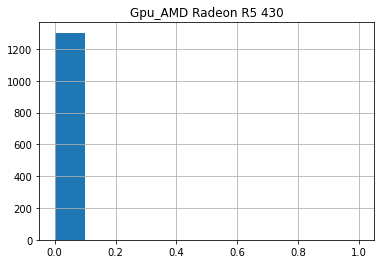

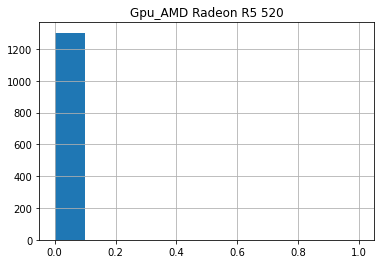

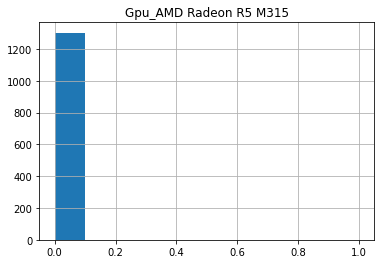

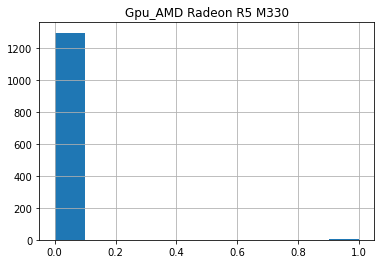

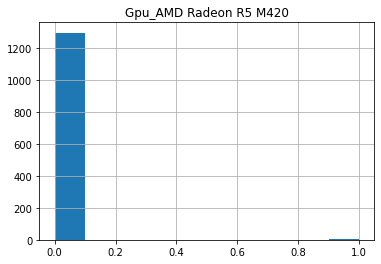

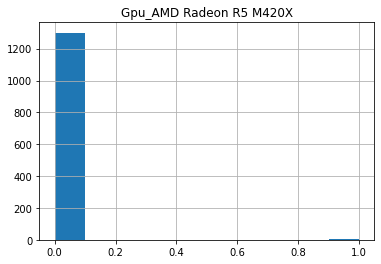

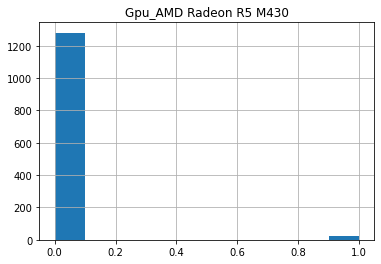

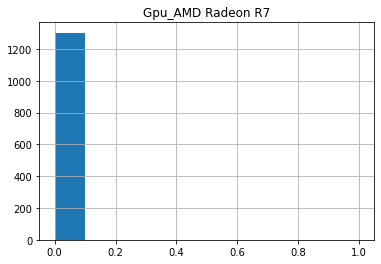

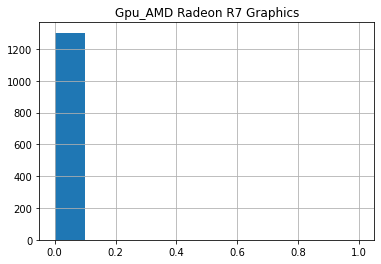

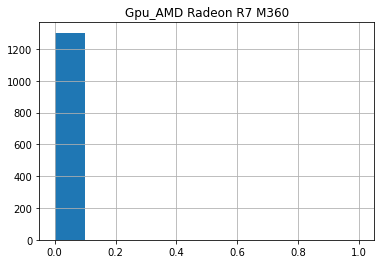

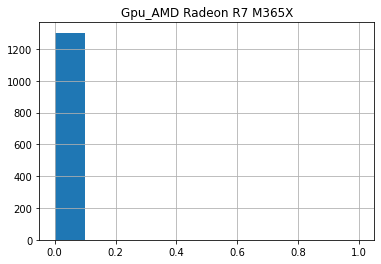

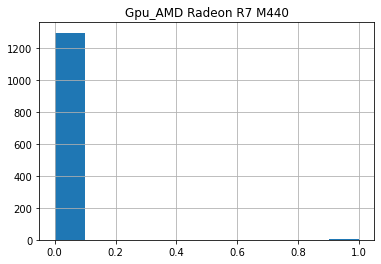

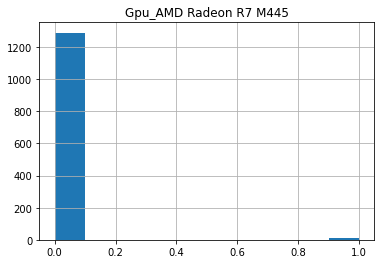

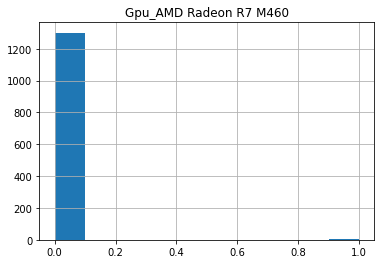

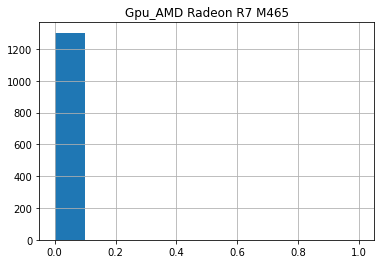

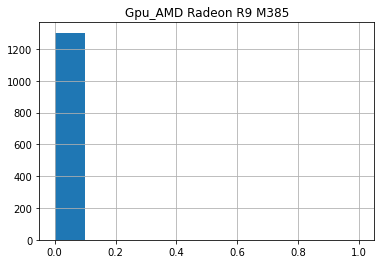

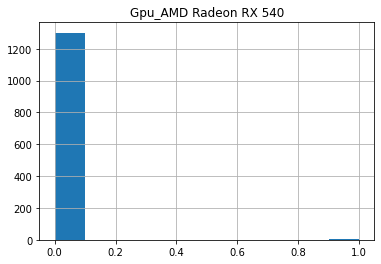

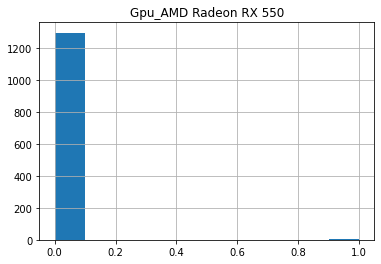

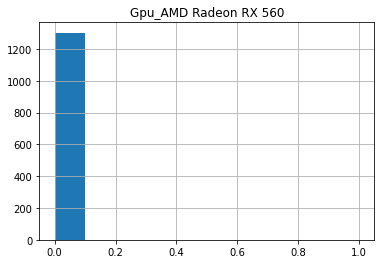

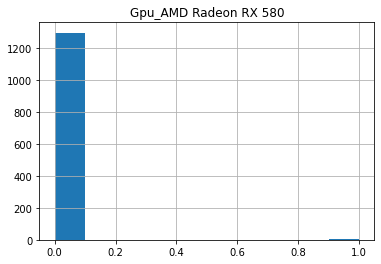

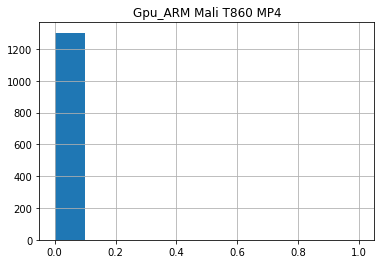

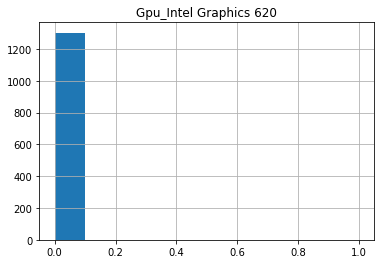

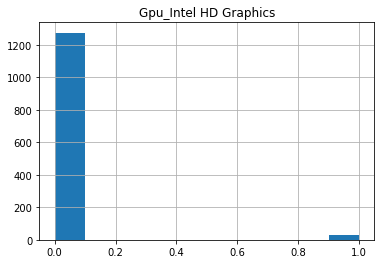

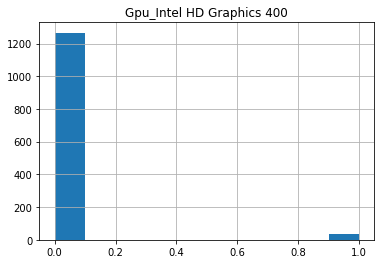

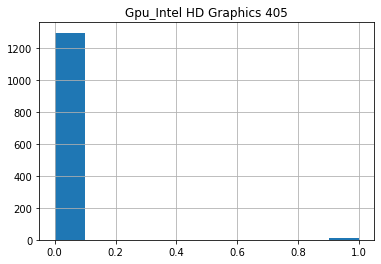

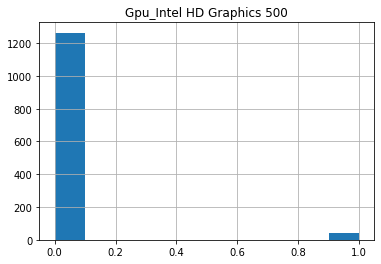

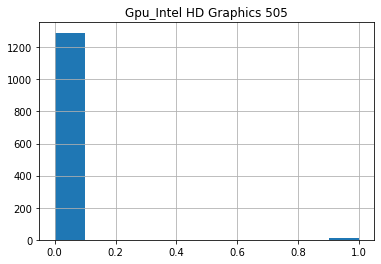

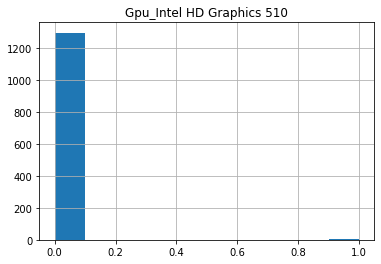

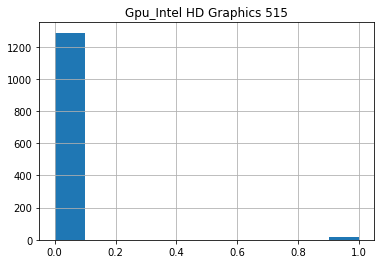

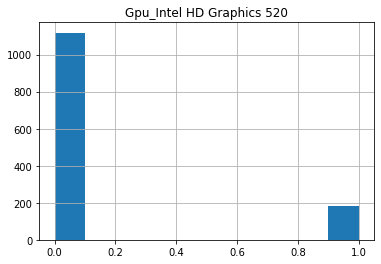

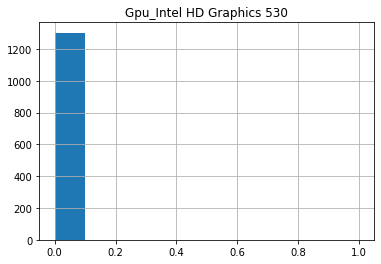

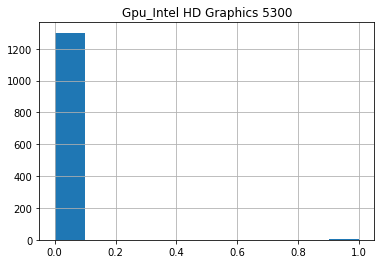

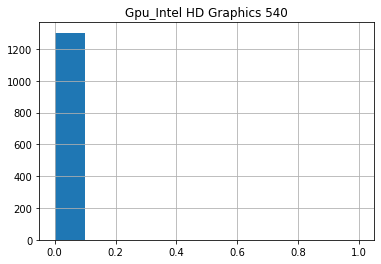

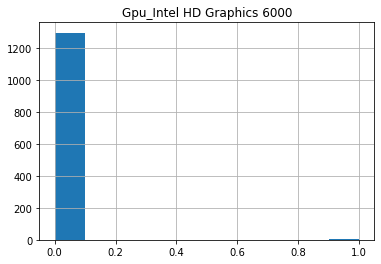

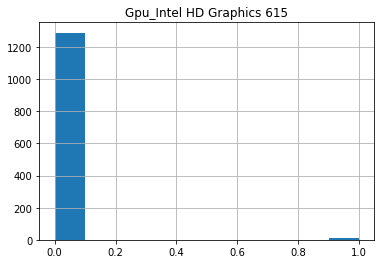

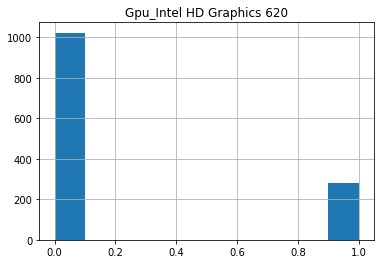

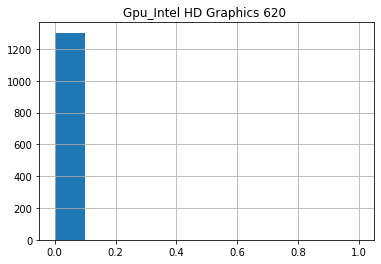

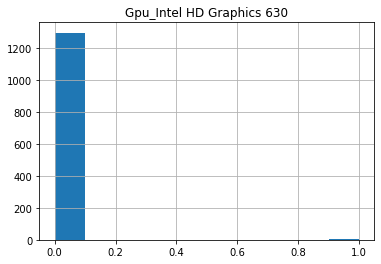

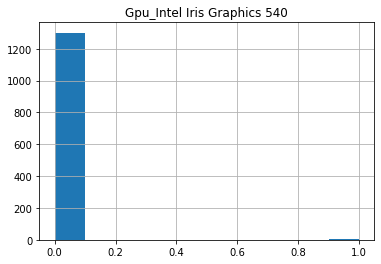

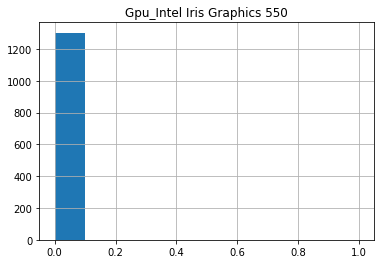

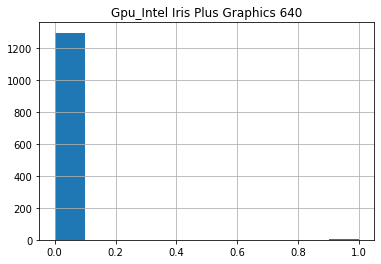

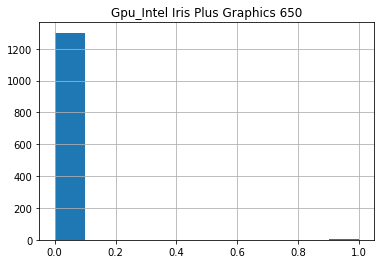

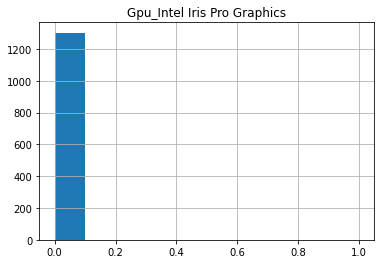

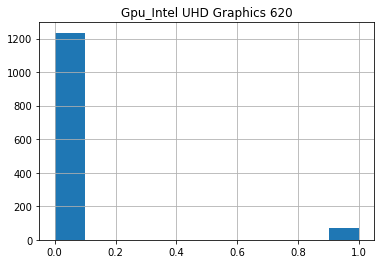

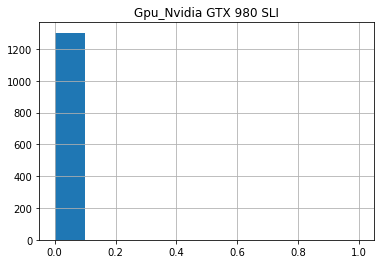

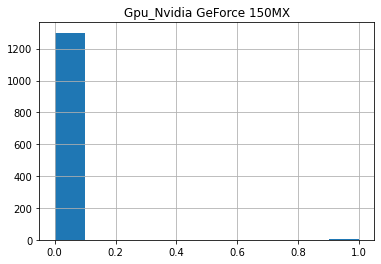

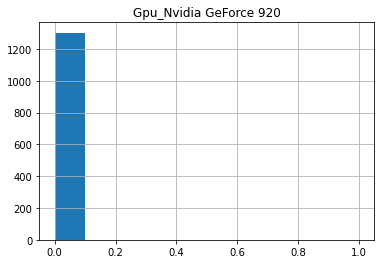

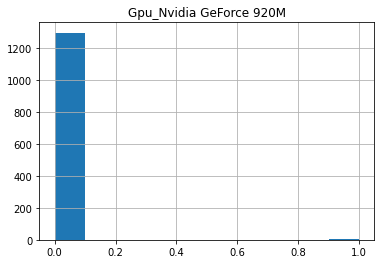

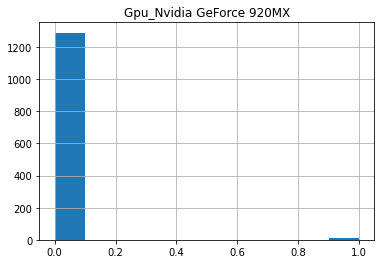

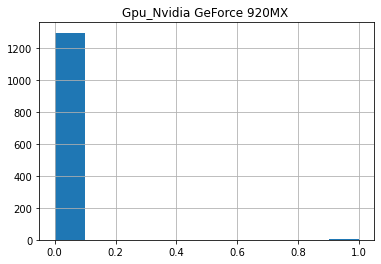

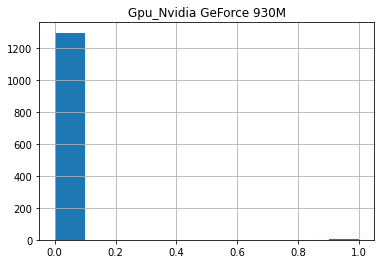

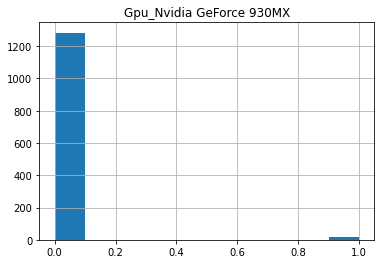

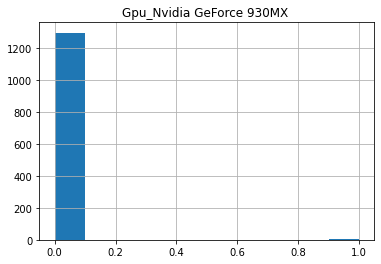

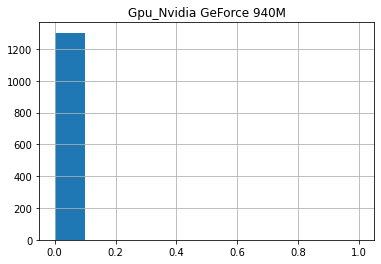

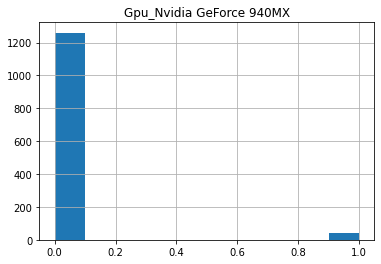

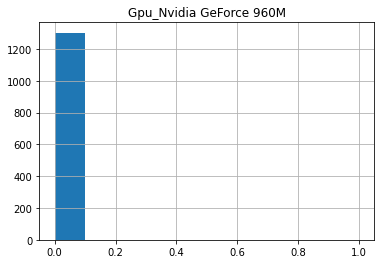

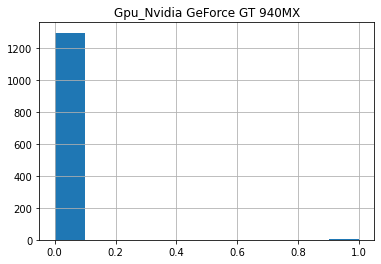

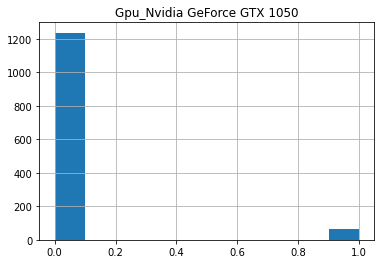

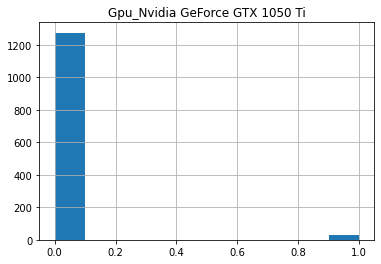

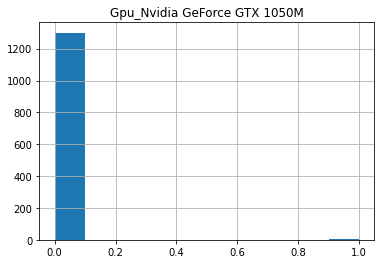

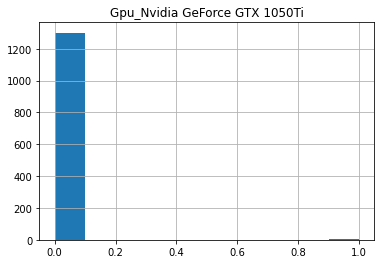

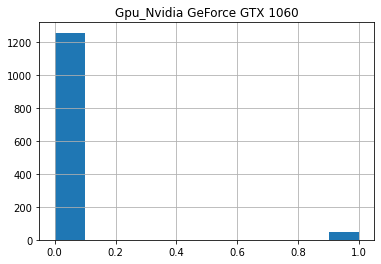

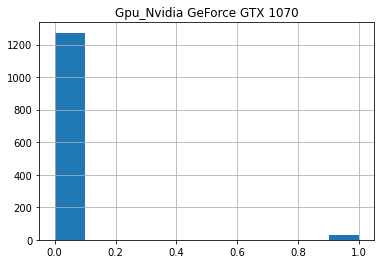

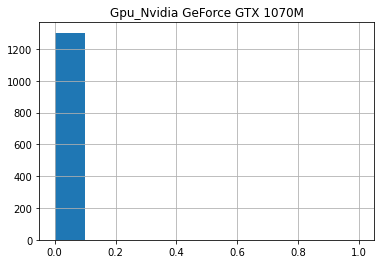

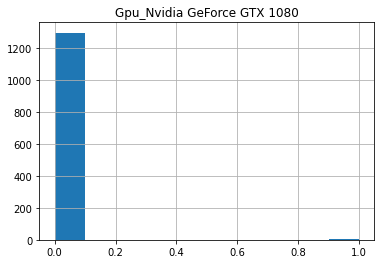

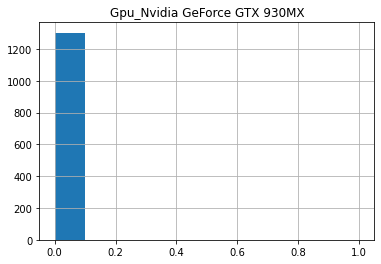

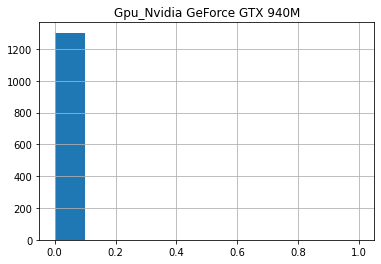

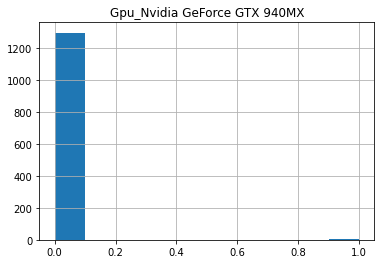

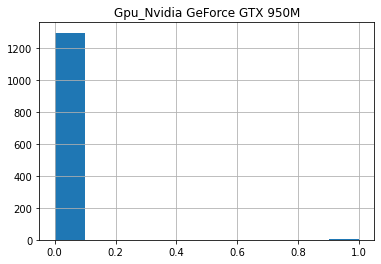

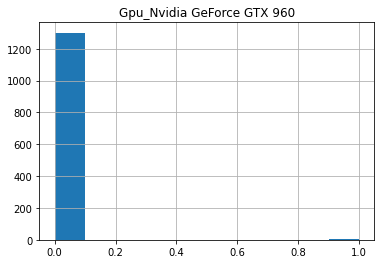

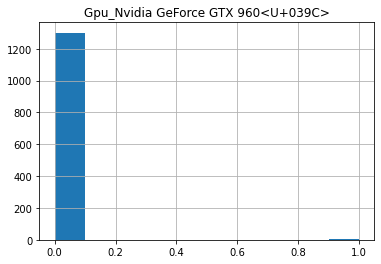

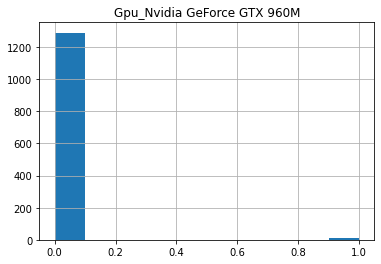

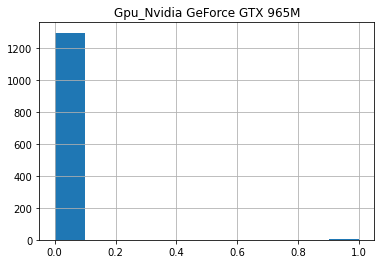

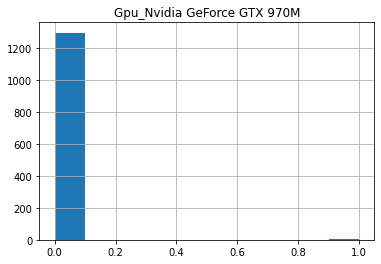

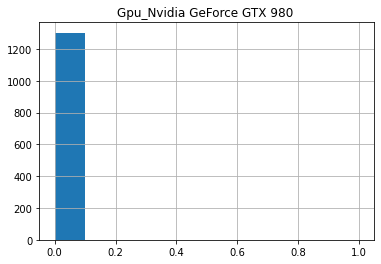

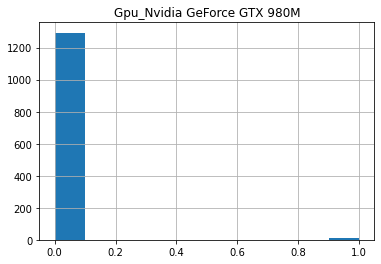

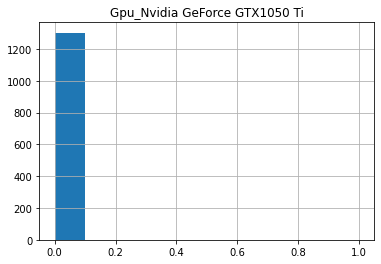

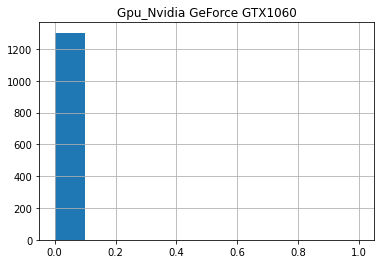

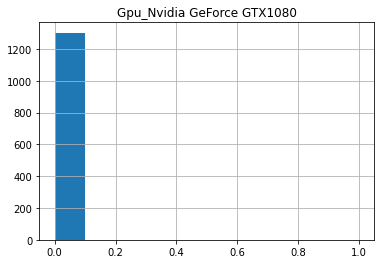

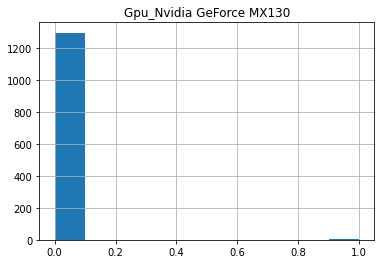

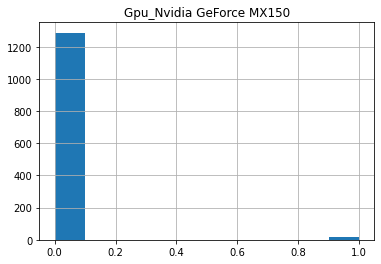

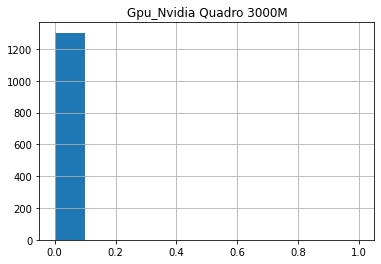

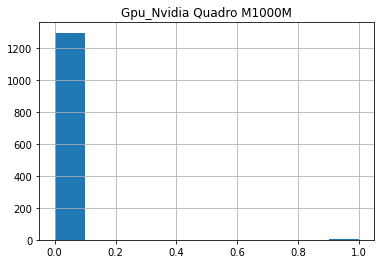

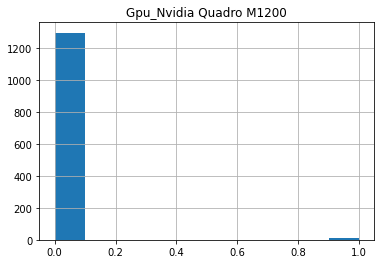

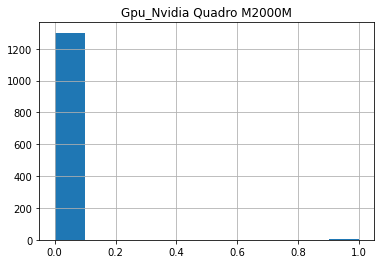

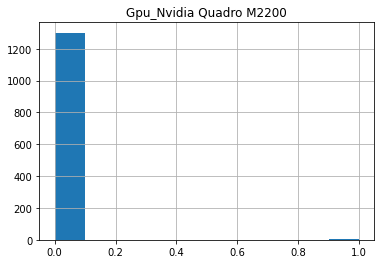

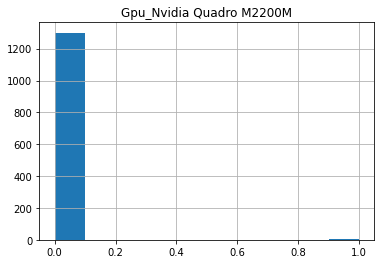

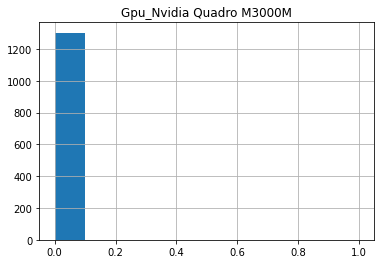

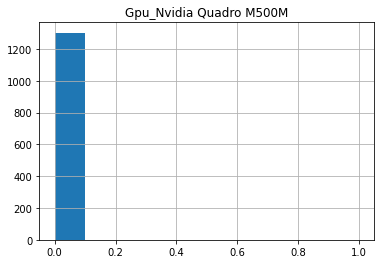

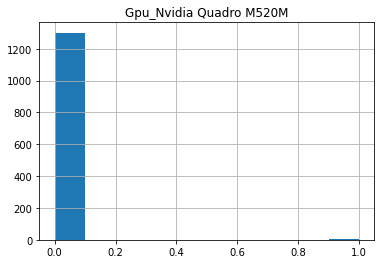

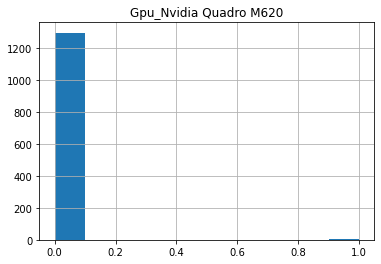

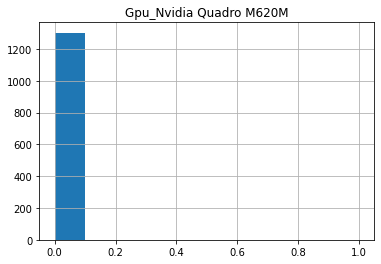

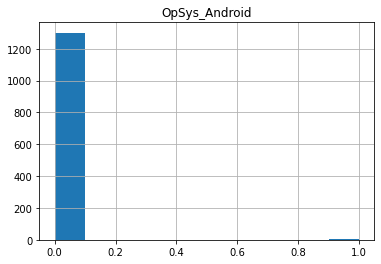

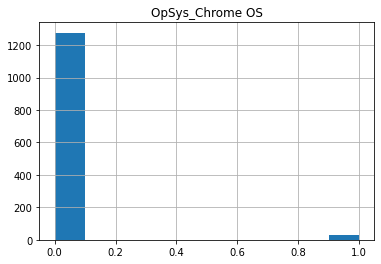

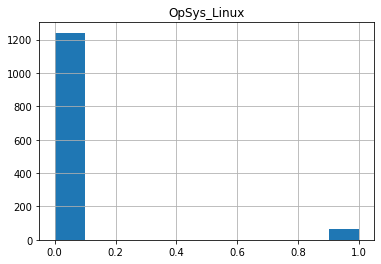

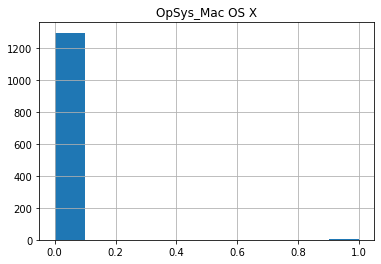

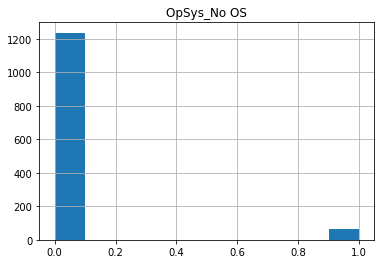

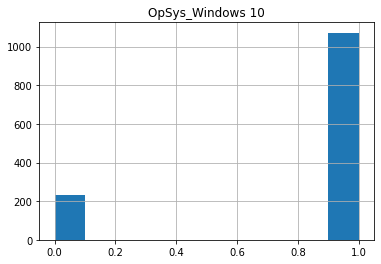

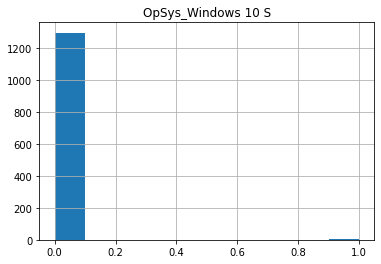

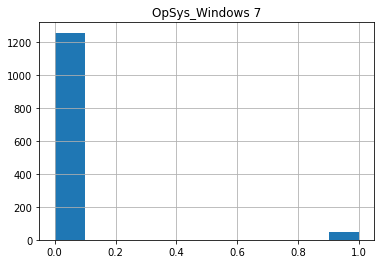

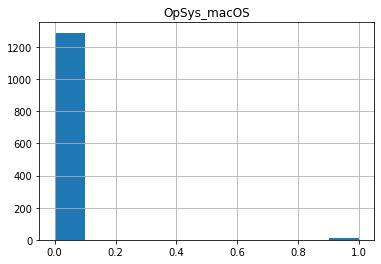

In [ ]:
for col in data_final.columns:
  #print(col)
  data_final.hist(column=col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price_euros  1303 non-null   float64
 1   Ram          1303 non-null   int64  
 2   Weight       1303 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 30.7 KB


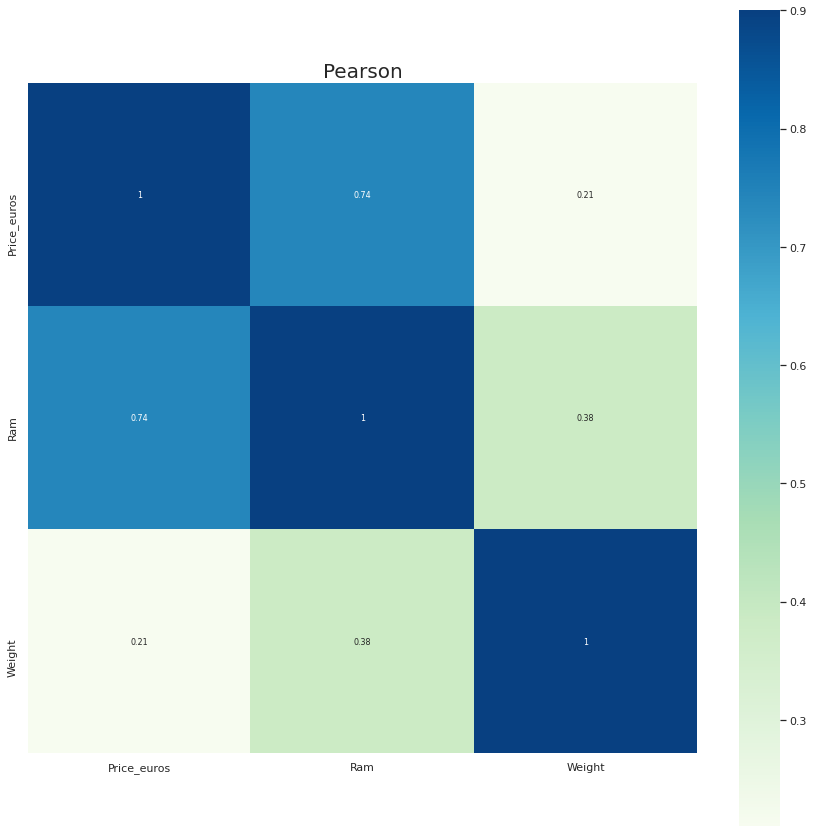

In [10]:
data_x  = data_final[['Price_euros','Ram','Weight']]
'''
Price_euros                           1303 non-null   float64
 2   Ram_12GB                              1303 non-null   uint8  
 3   Ram_16GB                              1303 non-null   uint8  
 4   Ram_24GB                              1303 non-null   uint8  
 5   Ram_2GB                               1303 non-null   uint8  
 6   Ram_32GB                              1303 non-null   uint8  
 7   Ram_4GB                               1303 non-null   uint8  
 8   Ram_64GB                              1303 non-null   uint8  
 9   Ram_6GB                               1303 non-null   uint8  
 10  Ram_8GB   
 '''
data_x.info()
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Pearson",fontsize=20)
sns.heatmap(data_x.corr(),vmax=0.9,square=True,cmap="GnBu",linecolor='b',annot=True,annot_kws={'size':8})

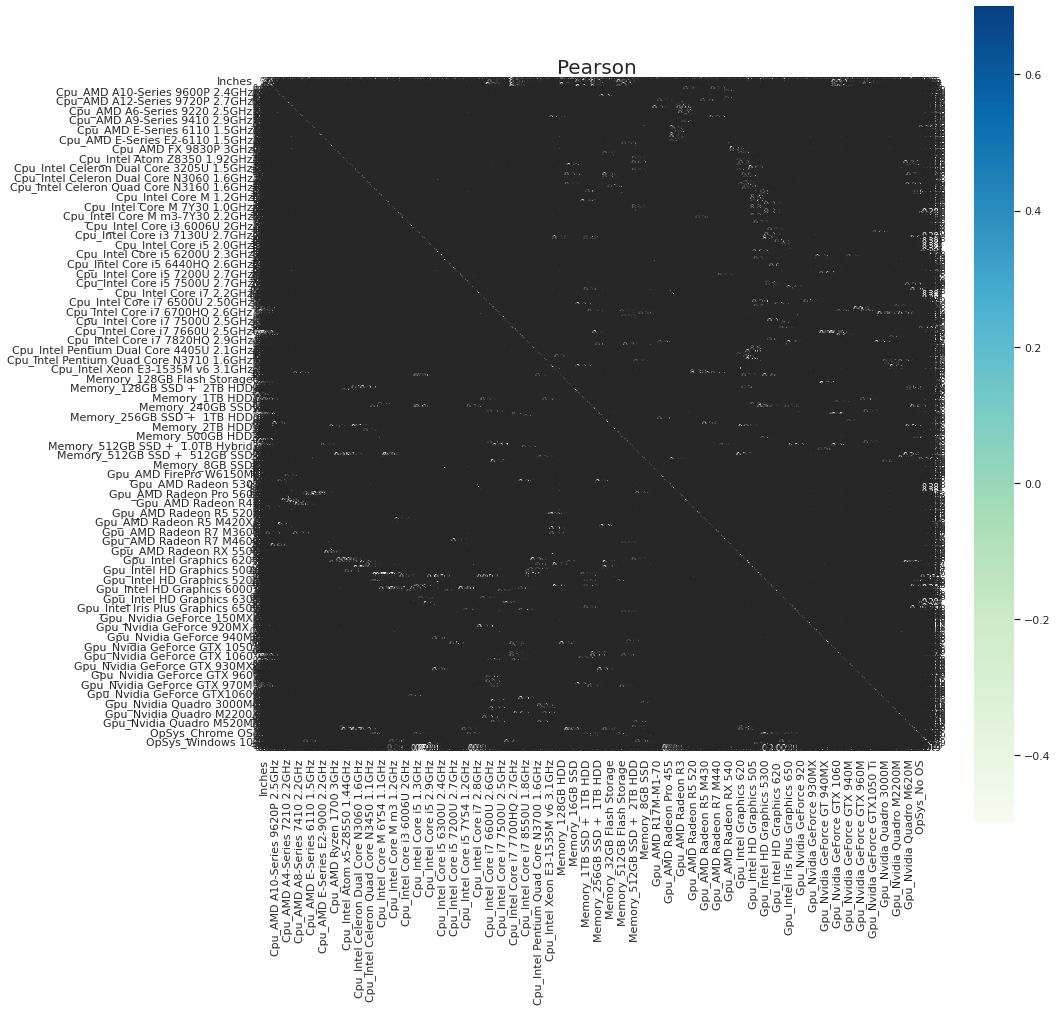

In [ ]:
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Pearson",fontsize=20)
sns.heatmap(data_final.corr(),vmax=0.7,square=True,cmap="GnBu",linecolor='b',annot=True,annot_kws={'size':8})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


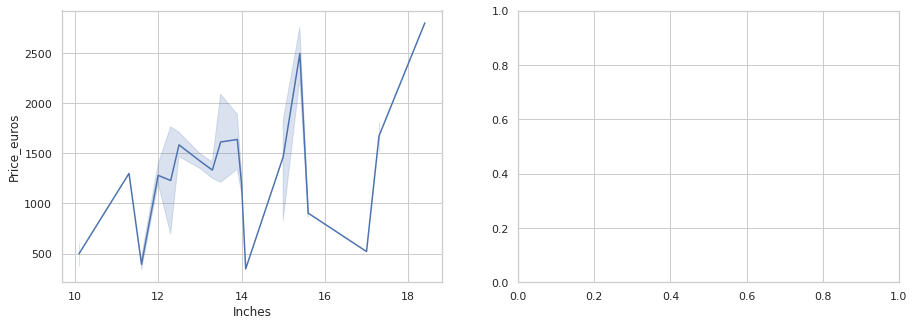

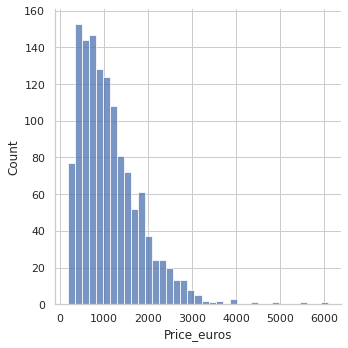

In [ ]:
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.displot(data_final['Price_euros'],ax=axes[1])
sns.lineplot(x='Inches',y='Price_euros',data=data_final,ax=axes[0])

In [11]:
## Asignqmos a X la data para crear nuestro modelo
X = data_final.drop(['Price_euros'],axis=1)
print("Valores de X ","\n",X)
## Asignamos a y la variable objetivo
y = data_final['Price_euros']
print("Valores de Y ","\n",y)

Valores de X  
       Inches  Ram  Weight  ...  OpSys_Windows 10 S  OpSys_Windows 7  OpSys_macOS
0       13.3    8    1.37  ...                   0                0            1
1       13.3    8    1.34  ...                   0                0            1
2       15.6    8    1.86  ...                   0                0            0
3       15.4   16    1.83  ...                   0                0            1
4       13.3    8    1.37  ...                   0                0            1
...      ...  ...     ...  ...                 ...              ...          ...
1298    14.0    4    1.80  ...                   0                0            0
1299    13.3   16    1.30  ...                   0                0            0
1300    14.0    2    1.50  ...                   0                0            0
1301    15.6    6    2.19  ...                   0                0            0
1302    15.6    4    2.20  ...                   0                0            0

[1303 rows 

REDUCCIÓN DE DIMENSIONALIDAD POR ANÁLISIS DE COMPONENTES

In [12]:
def traintestSplit(X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
  return X_train,X_test,y_train,y_test

In [13]:
def generarPCA(X,num_componentes):
  pca = PCA(n_components=num_componentes)
  cp = pca.fit_transform(X)  ## la data_final es el que queremos transformar
  dataframePCA = pd.DataFrame(data=cp,columns=['cp1','cp2','cp3','cp4'])
  return dataframePCA

In [17]:
## Generamos el PCA y la data es devuelta en el dataframePCA
dataframePCA = (generarPCA(data_final,4))

In [18]:
print(dataframePCA)

              cp1       cp2       cp3       cp4
0      215.997303 -1.837616  1.590732 -0.693339
1     -224.746183  0.531828  1.904100 -0.612267
2     -548.681044  2.593374 -0.037677  1.123816
3     1413.783489 -0.031334  0.036655 -0.502474
4      679.900593 -4.348955  1.312972 -0.201728
...           ...       ...       ...       ...
1298  -485.703768 -1.889566  0.641440 -0.612584
1299   375.348414  5.187104  2.863722 -0.586696
1300  -894.708625 -1.664904  0.680522 -0.309098
1301  -359.694601 -0.299555 -0.801188 -0.236909
1302  -754.699599 -0.173228 -0.825207 -0.224729

[1303 rows x 4 columns]


In [19]:
## Creación de la data de entrenamiento de la data aplicado el PCA, PCA con cuatro componentes.
X_train,X_test,y_train,y_test = traintestSplit(generarPCA(data_final,4), y) 

In [20]:
'''model = Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(4,activation='relu'))
#model.add(Dense(1,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
'''
model = Sequential()
model.add(Dense(278,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')



In [21]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=150,epochs=200,verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 81ms/step - loss: 1805270.0938 - val_loss: 1508400.5000
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 1604207.6875 - val_loss: 1322167.7500
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 1326466.0000 - val_loss: 1068254.5000
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 1059472.8359 - val_loss: 766560.2500
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 678567.2734 - val_loss: 493601.5625
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 424766.5078 - val_loss: 426556.9375
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 438822.7773 - val_loss: 432653.0938
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 394601.6719 - val_loss: 460148.2812
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 449448.2461 - val_loss: 523908.1250
Epoch 10/200
7/7 [====

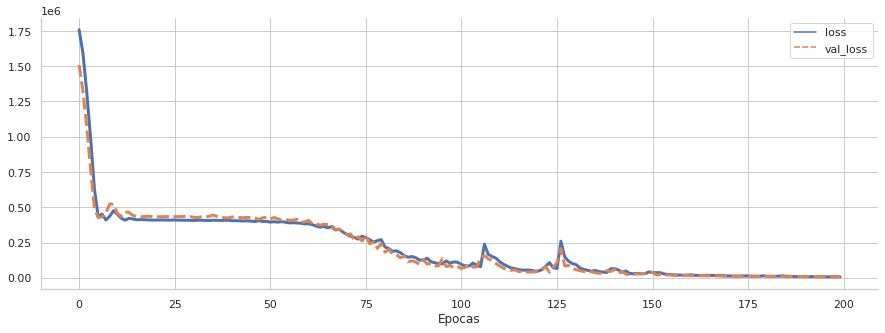

In [23]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
plt.xlabel('Epocas')
sns.despine()

In [32]:
prediccion = model.predict(X_test)
print("Error medio absoluto: ",mean_absolute_error(y_test,prediccion))

Error medio absoluto:  53.43518932918148


In [26]:
inv_test = data_final.drop('Price_euros',axis=1).iloc[0]
inv_test.shape ## me vota el número de filas y columnas, 279 filas, que es el 30% de la data

(279,)

In [31]:
print(dataframePCA)

              cp1       cp2       cp3       cp4
0      215.997303 -1.837616  1.590732 -0.693339
1     -224.746183  0.531828  1.904100 -0.612267
2     -548.681044  2.593374 -0.037677  1.123816
3     1413.783489 -0.031334  0.036655 -0.502474
4      679.900593 -4.348955  1.312972 -0.201728
...           ...       ...       ...       ...
1298  -485.703768 -1.889566  0.641440 -0.612584
1299   375.348414  5.187104  2.863722 -0.586696
1300  -894.708625 -1.664904  0.680522 -0.309098
1301  -359.694601 -0.299555 -0.801188 -0.236909
1302  -754.699599 -0.173228 -0.825207 -0.224729

[1303 rows x 4 columns]


In [38]:

print('Real price      : $',data_final.iloc[0]['Price_euros'])
##print('Pred $',model.predict(scaler.transform(inv_test.values.reshape(-1,279)))[0,0])
print('Prediction Price: $',model.predict(dataframePCA)[0,0])


Real price      : $ 1339.69
Prediction Price: $ 1276.4435


-------------
ANÁLISIS DE LA RN AJUSTANDO EL NÚMERO DE NEURONAS Y CAPAS
_____________________________________________

In [45]:
model2 = Sequential()
model2.add(Dense(14,activation='relu'))
model2.add(Dense(7,activation='relu'))
model2.add(Dense(4,activation='relu'))

model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

In [46]:
model2.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=150,epochs=200,verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 32ms/step - loss: 1554505.4531 - val_loss: 1435646.5000
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 1561285.4844 - val_loss: 1395696.5000
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 1485782.3125 - val_loss: 1358770.1250
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 1429351.5781 - val_loss: 1327139.2500
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 1390796.2031 - val_loss: 1294362.0000
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 1371491.7344 - val_loss: 1259538.3750
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 1385750.2188 - val_loss: 1227077.6250
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 1319406.8438 - val_loss: 1194076.6250
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 1205104.7500 - val_loss: 1159644.1250
Epoch 10/200


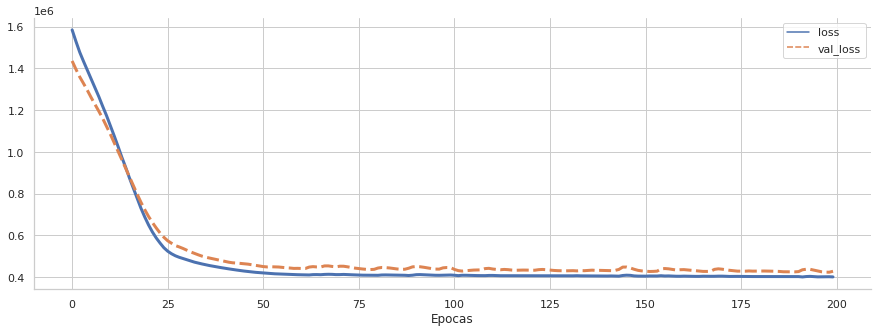

In [47]:
loss = pd.DataFrame(model2.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
plt.xlabel('Epocas')
sns.despine()

In [48]:
prediccion = model2.predict(X_test)
print("Error medio absoluto: ",mean_absolute_error(y_test,prediccion))

Error medio absoluto:  567.2820168282003


In [49]:
inv_test = data_final.drop('Price_euros',axis=1).iloc[0]
inv_test.shape ## me vota el número de filas y columnas, 279 filas, que es el 30% de la data

(279,)

In [51]:
print('Real price      : $',data_final.iloc[0]['Price_euros'])
##print('Pred $',model.predict(scaler.transform(inv_test.values.reshape(-1,279)))[0,0])
print('Prediction Price: $',model2.predict(dataframePCA)[0,0])

Real price      : $ 1339.69
Prediction Price: $ 426.7995


PORCENTAGE DE VARIANZA ACUMULADA

tipo de dato modelo_PCA <class 'sklearn.decomposition._pca.PCA'>
------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.25 0.5  0.75 1.  ]
len data_var :  1303


Text(0, 0.5, 'Por. varianza acumulada')

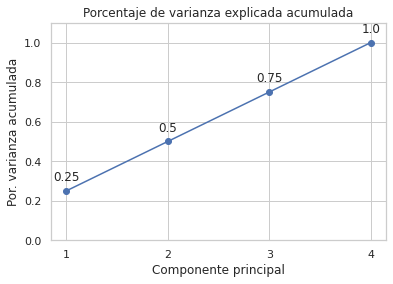

In [ ]:
# ==============================================================================
# prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
'''pca = PCA(n_components=n_componentes)
  cp = pca.fit_transform(X)  ## la data_final es el que queremos transformar
  dataframePCA = pd.DataFrame(data=cp,columns=['cp1','cp2'])
  
'''
##pca = PCA(n_components=num_componentes_PCA)
##cp = pca.fit_transform(data_final)  ## la data_final es el que queremos transformar
##dataframePCA = pd.DataFrame(data=cp,columns=['cp1','cp2'])
##print("tipo de dato cp",type(cp))

##data_var = data_final
data_var = dataframePCA

# Se extrae el modelo entrenado del pipeline
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_var)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
print("tipo de dato modelo_PCA",type(modelo_pca))

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data_var.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

print("len data_var : ",len(data_var))
for x, y in zip(np.arange(len(data_var)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')


Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 50% de la varianza observada, con 3 el 75%.